In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kalimati_veg_data = pd.read_csv('veg_price_list.csv')
kalimati_veg_data.head()

Date              कृषि उपज    ईकाइ   न्यूनतम    अधिकतम       औसत
0  01/01/2023  गोलभेडा ठूलो(नेपाली)  के.जी.  रू ४०.००  रू ५०.००  रू ४५.००
1  01/01/2023  गोलभेडा ठूलो(भारतीय)    केजी  रू ४०.००  रू ५०.००  रू ४५.००
2  01/01/2023    गोलभेडा सानो(लोकल)  के.जी.  रू २०.००  रू ३०.००  रू २५.००
3  01/01/2023    गोलभेडा सानो(टनेल)   के जी  रू ३०.००  रू ४०.००  रू ३५.००
4  01/01/2023  गोलभेडा सानो(भारतीय)   के जी  रू ४०.००  रू ५०.००  रू ४५.००

In [3]:
kalimati_veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102625 entries, 0 to 102624
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      102625 non-null  object
 1   कृषि उपज  102625 non-null  object
 2   ईकाइ      102620 non-null  object
 3   न्यूनतम   102620 non-null  object
 4   अधिकतम    102620 non-null  object
 5   औसत       102620 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


In [602]:
kalimati_veg_data['minimum']= kalimati_veg_data['न्यूनतम'].str.split(' ').str[1]
kalimati_veg_data['maximum']= kalimati_veg_data['अधिकतम'].str.split(' ').str[1]
kalimati_veg_data['average']= kalimati_veg_data['औसत'].str.split(' ').str[1]


In [603]:
kalimati_veg_data.head()

Date              कृषि उपज    ईकाइ   न्यूनतम    अधिकतम       औसत  \
0  01/01/2023  गोलभेडा ठूलो(नेपाली)  के.जी.  रू ४०.००  रू ५०.००  रू ४५.००   
1  01/01/2023  गोलभेडा ठूलो(भारतीय)    केजी  रू ४०.००  रू ५०.००  रू ४५.००   
2  01/01/2023    गोलभेडा सानो(लोकल)  के.जी.  रू २०.००  रू ३०.००  रू २५.००   
3  01/01/2023    गोलभेडा सानो(टनेल)   के जी  रू ३०.००  रू ४०.००  रू ३५.००   
4  01/01/2023  गोलभेडा सानो(भारतीय)   के जी  रू ४०.००  रू ५०.००  रू ४५.००   

  minimum maximum average  
0   ४०.००   ५०.००   ४५.००  
1   ४०.००   ५०.००   ४५.००  
2   २०.००   ३०.००   २५.००  
3   ३०.००   ४०.००   ३५.००  
4   ४०.००   ५०.००   ४५.००

In [604]:

# Mapping Nepali to English digits
nep_to_eng = str.maketrans('०१२३४५६७८९', '0123456789')

# Apply translation to all string columns
# df1 = df1.applymap(lambda x: x.translate(nep_to_eng) if isinstance(x, str) else x)
kalimati_veg_data = kalimati_veg_data.apply(lambda col: col.map(lambda x: x.translate(nep_to_eng) if isinstance(x, str) else x))



In [605]:
kalimati_veg_data.head()

Date              कृषि उपज    ईकाइ   न्यूनतम    अधिकतम       औसत  \
0  01/01/2023  गोलभेडा ठूलो(नेपाली)  के.जी.  रू 40.00  रू 50.00  रू 45.00   
1  01/01/2023  गोलभेडा ठूलो(भारतीय)    केजी  रू 40.00  रू 50.00  रू 45.00   
2  01/01/2023    गोलभेडा सानो(लोकल)  के.जी.  रू 20.00  रू 30.00  रू 25.00   
3  01/01/2023    गोलभेडा सानो(टनेल)   के जी  रू 30.00  रू 40.00  रू 35.00   
4  01/01/2023  गोलभेडा सानो(भारतीय)   के जी  रू 40.00  रू 50.00  रू 45.00   

  minimum maximum average  
0   40.00   50.00   45.00  
1   40.00   50.00   45.00  
2   20.00   30.00   25.00  
3   30.00   40.00   35.00  
4   40.00   50.00   45.00

In [606]:
kalimati_veg_data['कृषि उपज'].unique()

array(['गोलभेडा ठूलो(नेपाली)', 'गोलभेडा ठूलो(भारतीय)',
       'गोलभेडा सानो(लोकल)', 'गोलभेडा सानो(टनेल)', 'गोलभेडा सानो(भारतीय)',
       'गोलभेडा सानो(तराई)', 'आलु रातो', 'आलु रातो(भारतीय)', 'आलु सेतो',
       'प्याज सुकेको (भारतीय)', 'गाजर(लोकल)', 'बन्दा(लोकल)',
       'बन्दा(नरिवल)', 'काउली स्थानिय', 'स्थानीय काउली(ज्यापु)',
       'काउली तराई', 'मूला रातो', 'मूला सेतो(लोकल)',
       'सेतो मूला(हाइब्रीड)', 'भन्टा लाम्चो', 'भन्टा डल्लो', 'बोडी(तने)',
       'मकै बोडी', 'मटरकोशा', 'घिउ सिमी(लोकल)', 'घिउ सिमी(हाइब्रीड)',
       'घिउ सिमी(राजमा)', 'टाटे सिमी', 'तितो करेला', 'लौका', 'परवर(तराई)',
       'घिरौला', 'फर्सी पाकेको', 'फर्सी हरियो(लाम्चो)',
       'हरियो फर्सी(डल्लो)', 'सलगम', 'भिण्डी', 'सखरखण्ड', 'बरेला',
       'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग', 'चमसूरको साग',
       'तोरीको साग', 'मेथीको साग', 'प्याज हरियो', 'बकूला', 'तरुल',
       'च्याउ(कन्य)', 'च्याउ(डल्ले)', 'कुरीलो', 'ब्रोकाउली', 'चुकुन्दर',
       'सजिवन', 'रातो बन्दा', 'जिरीको साग', 'ग्याठ कोबी', 'सेलरी',
 

In [607]:
import pandas as pd

# --- 1️⃣ Mapping dictionary (Nepali → English with underscores) ---
name_map = {
    'गोलभेडा ठूलो(नेपाली)': 'Tomato_Big',
    'गोलभेडा ठूलो(भारतीय)': 'Tomato_Large_Indian',
    'गोलभेडा सानो(लोकल)': 'Tomato_Small',
    'गोलभेडा सानो(टनेल)': 'Tomato_Small',
    'गोलभेडा सानो(भारतीय)': 'Tomato_Small_Indian',
    'गोलभेडा सानो(तराई)': 'Tomato_Small',
    'रुख टमाटर': 'Tree_Tomato',
    'आलु रातो': 'Potato_Red',
    'आलु रातो(भारतीय)': 'Potato_Red_Indian',
    'आलु रातो(मुडे)': 'Potato_Red',
    'आलु सेतो': 'Potato_White',
    'प्याज सुकेको (भारतीय)': 'Onion_Dried_Indian',
    'सुकेको प्याज (चाइनिज)': 'Onion_Dried_Chinese',
    'प्याज हरियो': 'Onion_Green',
    'गाजर(लोकल)': 'Carrot_Local',
    'गाजर(तराई)': 'Carrot',
    'बन्दा(लोकल)': 'Cabbage',
    'बन्दा(तराई)': 'Cabbage',
    'बन्दा(नरिवल)': 'Cabbage_Coconut',
    'रातो बन्दा': 'Cabbage_Red',
    'काउली स्थानिय': 'Cauliflower',
    'स्थानीय काउली(ज्यापु)': 'Cauliflower',
    'काउली तराई': 'Cauliflower',
    'भन्टा लाम्चो': 'Brinjal_Long',
    'भन्टा डल्लो': 'Brinjal_Round',
    'बोडी(तने)': 'Bean_Tane',
    'मकै बोडी': 'Bean_Corn',
    'मटरकोशा': 'Pea_Shell',
    'घिउ सिमी(लोकल)': 'Ghee_Beans_Local',
    'घिउ सिमी(हाइब्रीड)': 'Ghee_Beans_Hybrid',
    'घिउ सिमी(राजमा)': 'Ghee_Beans_Rajma',
    'टाटे सिमी': 'Broad_Beans',
    'तितो करेला': 'Bitter_Gourd',
    'लौका': 'Bottle_Gourd',
    'परवर(तराई)': 'Pointed_Gourd_Terai',
    'परवर(लोकल)': 'Pointed_Gourd_Local',
    'घिरौला': 'Snake_Gourd',
    'फर्सी पाकेको': 'Pumpkin_Ripe',
    'फर्सी हरियो(लाम्चो)': 'Pumpkin_Green_Long',
    'हरियो फर्सी(डल्लो)': 'Pumpkin_Green_Round',
    'सलगम': 'Turnip',
    'भिण्डी': 'Lady_Finger',
    'सखरखण्ड': 'Sweet_Potato',
    'बरेला': 'Sponge_Gourd',
    'पिंडालू': 'Taro',
    'तरुल': 'Yam',
    'स्कूस': 'Squash',
    'रायो साग': 'Mustard_Leaf',
    'पालूगो साग': 'Spinach',
    'चमसूरको साग': 'Chamsur_Leaf',
    'तोरीको साग': 'Rapeseed_Leaf',
    'मेथीको साग': 'Fenugreek_Leaf',
    'बकूला': 'Bakul',
    'च्याउ(कन्य)': 'Mushroom_Kanya',
    'च्याउ(डल्ले)': 'Mushroom_Button',
    'राजा च्याउ': 'Mushroom_Raja',
    'सिताके च्याउ': 'Mushroom_Shitake',
    'कुरीलो': 'Asparagus',
    'ब्रोकाउली': 'Broccoli',
    'चुकुन्दर': 'Beetroot',
    'सजिवन': 'Drumstick_Leaf',
    'जिरीको साग': 'Jiri_Leaf',
    'ग्याठ कोबी': 'Kohlrabi',
    'सेलरी': 'Celery',
    'पार्सले': 'Parsley',
    'सौफको साग': 'Fennel_Leaf',
    'पुदीना': 'Mint',
    'गान्टे मूला': 'Radish_Long',
    'मूला रातो': 'Radish_Red',
    'मूला सेतो(लोकल)': 'Radish_White_Local',
    'सेतो मूला(हाइब्रीड)': 'Radish_White_Hybrid',
    'इमली': 'Tamarind',
    'तामा': 'Copper_Leaf',
    'तोफु': 'Tofu',
    'गुन्दुक': 'Gundruk',
    'स्याउ(फूजी)': 'Apple_Fuji',
    'स्याउ(झोले)': 'Apple_Jhole',
    'केरा': 'Banana',
    'कागती': 'Lemon',
    'निबुवा': 'Lime',
    'अनार': 'Pomegranate',
    'अंगुर(हरियो)': 'Grapes_Green',
    'अंगुर(कालो)': 'Grapes_Black',
    'सुन्तला(नेपाली)': 'Orange_Nepali',
    'सुन्तला(भारतीय)': 'Orange_Indian',
    'मौसम': 'Sweet_Orange',
    'जुनार': 'Junar_Orange',
    'भुई कटहर': 'Ground_Jackfruit',
    'रुख कटहर': 'Tree_Jackfruit',
    'काक्रो(लोकल)': 'Cucumber_Local',
    'काक्रो(हाइब्रीड)': 'Cucumber_Hybrid',
    'नासपाती(चाइनिज)': 'Pear_Chinese',
    'नासपाती(लोकल)': 'Pear_Local',
    'मेवा(नेपाली)': 'Guava_Nepali',
    'मेवा(भारतीय)': 'Guava_Indian',
    'अम्बा': 'Guava',
    'लप्सी': 'Hog_Plum',
    'किनु': 'Kinu_Orange',
    'स्ट्रबेरी भुईऐसेलु': 'Strawberry_Ground',
    'किवि': 'Kiwi',
    'शरीफा': 'Custard_Apple',
    'आभोकाडो': 'Avocado',
    'अमला': 'Gooseberry',
    'अदुवा': 'Ginger',
    'खु्र्सानी सुकेको': 'Chili_Dried',
    'खु्र्सानी हरियो': 'Chili_Green',
    'खुर्सानी हरियो(बुलेट)': 'Chili_Green_Bullet',
    'खुर्सानी हरियो(माछे)': 'Chili_Green_Mache',
    'खुर्सानी हरियो(अकबरे)': 'Chili_Green_Akabare',
    'भेडे खु्र्सानी': 'Chili_Bhede',
    'लसुन हरियो': 'Garlic_Green',
    'लसुन सुकेको चाइनिज': 'Garlic_Dried_Chinese',
    'लसुन सुकेको नेपाली': 'Garlic_Dried_Nepali',
    'हरियो धनिया': 'Coriander_Leaf',
    'छ्यापी सुकेको': 'Dry_Bamboo_Shoot',
    'छ्यापी हरियो': 'Fresh_Bamboo_Shoot',
    'ताजा माछा(रहु)': 'Fresh_Fish_Rohu',
    'ताजा माछा(बचुवा)': 'Fresh_Fish_Bachuwa',
    'ताजा माछा(छडी)': 'Fresh_Fish_Chadi',
    'ताजा माछा(मुंगरी)': 'Fresh_Fish_Mungri',
    'माछा सुकेको': 'Dried_Fish',
    'चिचिण्डो': 'Snake_Gourd_Chichindo',
    'उखु': 'Sugarcane',
    'न्यूरो': 'Neuro_Leaf',
    'कोइरालो': 'Koiralo_Flower',
    'आँप(चोसा)': 'Mango_Chosa',
    'आँप(दसहरी)': 'Mango_Dasheri',
    'आँप(मालदह)': 'Mango_Maldah',
    'आँप(कलकत्ते)': 'Mango_Kolkata',
    'लीच्ची(लोकल)': 'Litchi_Local',
    'लीच्ची(भारतीय)': 'Litchi_Indian',
    'खरबुजा': 'Melon',
    'चाक्सी': 'Chaksi',
    'भटमासकोशा': 'Soybean_Pod',
    'टेबलमा डाटा उपलब्ध भएन': 'Data_Not_Available',
    'झिगूनी': 'Jhinguni'
}

# --- 2️⃣ Translation function ---
def translate_veg_name(name: str) -> str:
    return name_map.get(name.strip(), name.strip())


kalimati_veg_data['commodity'] = kalimati_veg_data['कृषि उपज'].apply(translate_veg_name)

kalimati_veg_data.head()


Date              कृषि उपज    ईकाइ   न्यूनतम    अधिकतम       औसत  \
0  01/01/2023  गोलभेडा ठूलो(नेपाली)  के.जी.  रू 40.00  रू 50.00  रू 45.00   
1  01/01/2023  गोलभेडा ठूलो(भारतीय)    केजी  रू 40.00  रू 50.00  रू 45.00   
2  01/01/2023    गोलभेडा सानो(लोकल)  के.जी.  रू 20.00  रू 30.00  रू 25.00   
3  01/01/2023    गोलभेडा सानो(टनेल)   के जी  रू 30.00  रू 40.00  रू 35.00   
4  01/01/2023  गोलभेडा सानो(भारतीय)   के जी  रू 40.00  रू 50.00  रू 45.00   

  minimum maximum average            commodity  
0   40.00   50.00   45.00           Tomato_Big  
1   40.00   50.00   45.00  Tomato_Large_Indian  
2   20.00   30.00   25.00         Tomato_Small  
3   30.00   40.00   35.00         Tomato_Small  
4   40.00   50.00   45.00  Tomato_Small_Indian

In [608]:
kalimati_veg_data['commodity'].unique()

array(['Tomato_Big', 'Tomato_Large_Indian', 'Tomato_Small',
       'Tomato_Small_Indian', 'Potato_Red', 'Potato_Red_Indian',
       'Potato_White', 'Onion_Dried_Indian', 'Carrot_Local', 'Cabbage',
       'Cabbage_Coconut', 'Cauliflower', 'Radish_Red',
       'Radish_White_Local', 'Radish_White_Hybrid', 'Brinjal_Long',
       'Brinjal_Round', 'Bean_Tane', 'Bean_Corn', 'Pea_Shell',
       'Ghee_Beans_Local', 'Ghee_Beans_Hybrid', 'Ghee_Beans_Rajma',
       'Broad_Beans', 'Bitter_Gourd', 'Bottle_Gourd',
       'Pointed_Gourd_Terai', 'Snake_Gourd', 'Pumpkin_Ripe',
       'Pumpkin_Green_Long', 'Pumpkin_Green_Round', 'Turnip',
       'Lady_Finger', 'Sweet_Potato', 'Sponge_Gourd', 'Taro', 'Squash',
       'Mustard_Leaf', 'Spinach', 'Chamsur_Leaf', 'Rapeseed_Leaf',
       'Fenugreek_Leaf', 'Onion_Green', 'Bakul', 'Yam', 'Mushroom_Kanya',
       'Mushroom_Button', 'Asparagus', 'Broccoli', 'Beetroot',
       'Drumstick_Leaf', 'Cabbage_Red', 'Jiri_Leaf', 'Kohlrabi', 'Celery',
       'Parsley', 'Fe

In [609]:
kalimati_veg_data['ईकाइ'].unique()

array(['के.जी.', 'केजी', 'के जी', 'दर्जन', 'प्रति गोटा', 'के\u200d.जी',
       'के.जी', 'प्रति वटा', nan], dtype=object)

In [610]:
import pandas as pd
import numpy as np

# Mapping dictionary for Nepali units → English (underscore format)
unit_map = {
    'के.जी.': 'KG',
    'केजी': 'KG',
    'के जी': 'KG',
    'के.जी': 'KG',
    'के\u200d.जी': 'KG',  # Unicode variation (Zero-width joiner)
    'दर्जन': 'Dozen',
    'प्रति गोटा': 'Per_Piece',
    'प्रति वटा': 'Per_Item',
    np.nan: 'Unknown'
}

# Function to map unit safely
def translate_unit(unit):
    if pd.isna(unit):
        return 'Unknown'
    unit = unit.strip()
    return unit_map.get(unit, unit)

# Example
units = ['के.जी.', 'केजी', 'के जी', 'दर्जन', 'प्रति गोटा', 'के\u200d.जी', 'के.जी', 'प्रति वटा', np.nan]
kalimati_veg_data['Unit'] = kalimati_veg_data['ईकाइ'].apply(translate_unit)




In [611]:
kalimati_veg_data.head()

Date              कृषि उपज    ईकाइ   न्यूनतम    अधिकतम       औसत  \
0  01/01/2023  गोलभेडा ठूलो(नेपाली)  के.जी.  रू 40.00  रू 50.00  रू 45.00   
1  01/01/2023  गोलभेडा ठूलो(भारतीय)    केजी  रू 40.00  रू 50.00  रू 45.00   
2  01/01/2023    गोलभेडा सानो(लोकल)  के.जी.  रू 20.00  रू 30.00  रू 25.00   
3  01/01/2023    गोलभेडा सानो(टनेल)   के जी  रू 30.00  रू 40.00  रू 35.00   
4  01/01/2023  गोलभेडा सानो(भारतीय)   के जी  रू 40.00  रू 50.00  रू 45.00   

  minimum maximum average            commodity Unit  
0   40.00   50.00   45.00           Tomato_Big   KG  
1   40.00   50.00   45.00  Tomato_Large_Indian   KG  
2   20.00   30.00   25.00         Tomato_Small   KG  
3   30.00   40.00   35.00         Tomato_Small   KG  
4   40.00   50.00   45.00  Tomato_Small_Indian   KG

In [612]:
select_column = ['Date','commodity','Unit','minimum','maximum','average']
kalimati_veg_data = kalimati_veg_data[select_column]
kalimati_veg_data.head()

Date            commodity Unit minimum maximum average
0  01/01/2023           Tomato_Big   KG   40.00   50.00   45.00
1  01/01/2023  Tomato_Large_Indian   KG   40.00   50.00   45.00
2  01/01/2023         Tomato_Small   KG   20.00   30.00   25.00
3  01/01/2023         Tomato_Small   KG   30.00   40.00   35.00
4  01/01/2023  Tomato_Small_Indian   KG   40.00   50.00   45.00

In [613]:
kalimati_veg_data.isnull().sum()

Date         0
commodity    0
Unit         0
minimum      5
maximum      5
average      5
dtype: int64

In [614]:
kalimati_veg_data.tail()

Date           commodity Unit minimum   maximum average
102192  10/20/2025  Fresh_Fish_Bachuwa   KG  260.00    280.00  270.00
102193  10/20/2025    Fresh_Fish_Chadi   KG  220.00    240.00  230.00
102194  10/20/2025         Tree_Tomato   KG  130.00    140.00  135.00
102195  10/20/2025       Mushroom_Raja   KG  280.00    300.00  290.00
102196  10/20/2025    Mushroom_Shitake   KG  900.00  1,000.00  950.00

In [615]:
kalimati_veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102197 entries, 0 to 102196
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       102197 non-null  object
 1   commodity  102197 non-null  object
 2   Unit       102197 non-null  object
 3   minimum    102192 non-null  object
 4   maximum    102192 non-null  object
 5   average    102192 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


In [616]:

kalimati_veg_data['minimum'] = pd.to_numeric(kalimati_veg_data['minimum'], errors='coerce')
kalimati_veg_data['maximum'] = pd.to_numeric(kalimati_veg_data['maximum'], errors='coerce')
kalimati_veg_data['average'] = pd.to_numeric(kalimati_veg_data['average'], errors='coerce')

In [617]:
kalimati_veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102197 entries, 0 to 102196
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       102197 non-null  object 
 1   commodity  102197 non-null  object 
 2   Unit       102197 non-null  object 
 3   minimum    101933 non-null  float64
 4   maximum    101604 non-null  float64
 5   average    101909 non-null  float64
dtypes: float64(3), object(3)
memory usage: 4.7+ MB


In [618]:
kalimati_veg_data.isnull().sum()

Date           0
commodity      0
Unit           0
minimum      264
maximum      593
average      288
dtype: int64

In [619]:
kalimati_veg_data['Date'] = pd.to_datetime(kalimati_veg_data['Date'], errors='coerce')

In [620]:
kalimati_veg_data.head()

Date            commodity Unit  minimum  maximum  average
0 2023-01-01           Tomato_Big   KG     40.0     50.0     45.0
1 2023-01-01  Tomato_Large_Indian   KG     40.0     50.0     45.0
2 2023-01-01         Tomato_Small   KG     20.0     30.0     25.0
3 2023-01-01         Tomato_Small   KG     30.0     40.0     35.0
4 2023-01-01  Tomato_Small_Indian   KG     40.0     50.0     45.0

In [621]:
kalimati_veg_data.isnull().sum()

Date           0
commodity      0
Unit           0
minimum      264
maximum      593
average      288
dtype: int64

In [622]:
kalimati_veg_data['minimum'] = kalimati_veg_data['minimum'].fillna(kalimati_veg_data['minimum'].mean()) 
kalimati_veg_data['mximum'] = kalimati_veg_data['maximum'].fillna(kalimati_veg_data['maximum'].mean()) 
kalimati_veg_data['average'] = kalimati_veg_data['average'].fillna(kalimati_veg_data['average'].mean()) 

In [623]:
kalimati_veg_data.isnull().sum()

Date           0
commodity      0
Unit           0
minimum        0
maximum      593
average        0
mximum         0
dtype: int64

In [624]:
kalimati_veg_data.to_csv('Kalimati_veg_price_2023_2025.csv', index=False, encoding='utf-8-sig')

In [625]:
kalimati_veg_supply = pd.read_csv('arrival_merged.csv')
kalimati_veg_supply.head()

Date      कृषि उपज    ईकाइ        आगमन
0  01/01/2022  गोलभेडा सानो  के.जी.  १४२,५५५.००
1  01/01/2022      आलु रातो  के.जी.   ७०,७०२.००
2  01/01/2022      आलु सेतो  के.जी.   २५,०००.००
3  01/01/2022  प्याज सुकेको  के.जी.  ११५,०६६.००
4  01/01/2022          गाजर  के.जी.    ९,८३७.००

In [626]:

# Mapping Nepali to English digits
nep_to_eng = str.maketrans('०१२३४५६७८९', '0123456789')

# Apply translation to all string columns
kalimati_veg_supply = kalimati_veg_supply.applymap(lambda x: x.translate(nep_to_eng) if isinstance(x, str) else x)
kalimati_veg_supply

C:\Users\User\AppData\Local\Temp\ipykernel_31328\1814575311.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kalimati_veg_supply = kalimati_veg_supply.applymap(lambda x: x.translate(nep_to_eng) if isinstance(x, str) else x)


Date                कृषि उपज    ईकाइ        आगमन
0      01/01/2022            गोलभेडा सानो  के.जी.  142,555.00
1      01/01/2022                आलु रातो  के.जी.   70,702.00
2      01/01/2022                आलु सेतो  के.जी.   25,000.00
3      01/01/2022            प्याज सुकेको  के.जी.  115,066.00
4      01/01/2022                    गाजर  के.जी.    9,837.00
...           ...                     ...     ...         ...
60425  10/18/2025               माछा ताजा  के.जी.   19,856.00
60426  10/18/2025                    अन्य   के जी    3,950.00
60427  10/18/2025                     फूल  के.जी.    1,300.00
60428  10/18/2025               कुल जम्मा  के.जी.  656,536.00
60429  10/19/2025  टेबलमा डाटा उपलब्ध भएन     NaN         NaN

[60430 rows x 4 columns]

In [627]:

kalimati_veg_supply['Unit'] = kalimati_veg_supply['ईकाइ'].apply(translate_unit)




In [628]:
kalimati_veg_supply['ईकाइ'].unique()

array(['के.जी.', 'के जी', 'प्रति वटा', 'के.जी', nan, 'केजी'], dtype=object)

In [629]:
kalimati_veg_supply['Unit'].unique()

array(['KG', 'Per_Item', 'Unknown'], dtype=object)

In [630]:
kalimati_veg_supply.head()

Date      कृषि उपज    ईकाइ        आगमन Unit
0  01/01/2022  गोलभेडा सानो  के.जी.  142,555.00   KG
1  01/01/2022      आलु रातो  के.जी.   70,702.00   KG
2  01/01/2022      आलु सेतो  के.जी.   25,000.00   KG
3  01/01/2022  प्याज सुकेको  के.जी.  115,066.00   KG
4  01/01/2022          गाजर  के.जी.    9,837.00   KG

In [631]:
kalimati_veg_supply['कृषि उपज'].unique()

array(['गोलभेडा सानो', 'आलु रातो', 'आलु सेतो', 'प्याज सुकेको', 'गाजर',
       'बन्दा', 'काउली स्थानिय', 'मूला सेतो', 'भन्टा लाम्चो', 'बोडी',
       'मटरकोशा', 'घिउ सिमी', 'टाटे सिमी', 'तितो करेला', 'लौका',
       'फर्सी पाकेको', 'फर्सी हरियो', 'भिण्डी', 'सखरखण्ड', 'बरेला',
       'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग', 'चमसूरको साग',
       'तोरीको साग', 'प्याज हरियो', 'तरुल', 'च्याउ', 'ब्रोकाउली',
       'चुकुन्दर', 'स्याउ', 'केरा', 'कागती', 'सुन्तला', 'काक्रो', 'अम्बा',
       'लप्सी', 'अदुवा', 'खुर्सानी हरियो', 'भेडे खु्र्सानी', 'लसुन हरियो',
       'हरियो धनिया', 'लसुन सुकेको', 'माछा ताजा', 'अन्य', 'कुल जम्मा',
       'निबुवा', 'गोलभेडा ठूलो', 'बकूला', 'मूला रातो', 'परवर', 'मेवा',
       'भन्टा डल्लो', 'हरियो मकै', 'खु्र्सानी सुकेको', 'मेथीको साग',
       'चिचिण्डो', 'इमली', 'रुख कटहर', 'अनार', 'अंगुर', 'किनु', 'घिरौला',
       'अमला', 'मौसम', 'खरबुजा', 'तरबुजा', 'सजिवन', 'गुन्दुक', 'चाक्सी',
       'कोइरालो', 'न्यूरो', 'झिगूनी', 'भुई कटहर', 'कुरीलो', 'नासपाती',
       'पार्स

In [632]:
import pandas as pd

# --- Nepali → English (underscore format) ---
name_map = {
    'गोलभेडा सानो': 'Tomato_Small',
    'गोलभेडा ठूलो': 'Tomato_Big',
    'आलु रातो': 'Potato_Red',
    'आलु सेतो': 'Potato_White',
    'प्याज सुकेको': 'Onion_Dried',
    'प्याज हरियो': 'Onion_Green',
    'गाजर': 'Carrot',
    'बन्दा': 'Cabbage',
    'काउली स्थानिय': 'Cauliflower_Local',
    'मूला सेतो': 'Radish_White',
    'मूला रातो': 'Radish_Red',
    'भन्टा लाम्चो': 'Brinjal_Long',
    'भन्टा डल्लो': 'Brinjal_Round',
    'बोडी': 'Bean',
    'मटरकोशा': 'Pea_Shell',
    'घिउ सिमी': 'Ghee_Beans',
    'टाटे सिमी': 'Broad_Beans',
    'तितो करेला': 'Bitter_Gourd',
    'लौका': 'Bottle_Gourd',
    'फर्सी पाकेको': 'Pumpkin_Ripe',
    'फर्सी हरियो': 'Pumpkin_Green',
    'भिण्डी': 'Lady_Finger',
    'सखरखण्ड': 'Sweet_Potato',
    'बरेला': 'Sponge_Gourd',
    'पिंडालू': 'Taro',
    'तरुल': 'Yam',
    'स्कूस': 'Squash',
    'रायो साग': 'Mustard_Leaf',
    'पालूगो साग': 'Spinach',
    'चमसूरको साग': 'Chamsur_Leaf',
    'तोरीको साग': 'Rapeseed_Leaf',
    'मेथीको साग': 'Fenugreek_Leaf',
    'बकूला': 'Bakul',
    'च्याउ': 'Mushroom',
    'ब्रोकाउली': 'Broccoli',
    'चुकुन्दर': 'Beetroot',
    'स्याउ': 'Apple',
    'केरा': 'Banana',
    'कागती': 'Lemon',
    'निबुवा': 'Lime',
    'सुन्तला': 'Orange',
    'काक्रो': 'Cucumber',
    'अम्बा': 'Guava',
    'लप्सी': 'Hog_Plum',
    'अदुवा': 'Ginger',
    'खुर्सानी हरियो': 'Chili_Green',
    'भेडे खु्र्सानी': 'Chili_Bhede',
    'खु्र्सानी सुकेको': 'Chili_Dried',
    'लसुन हरियो': 'Garlic_Green',
    'लसुन सुकेको': 'Garlic_Dried',
    'हरियो धनिया': 'Coriander_Leaf',
    'माछा ताजा': 'Fresh_Fish',
    'माछा सुकेको': 'Dried_Fish',
    'अन्य': 'Other',
    'कुल जम्मा': 'Total',
    'परवर': 'Pointed_Gourd',
    'मेवा': 'Guava',
    'हरियो मकै': 'Green_Corn',
    'चिचिण्डो': 'Snake_Gourd',
    'इमली': 'Tamarind',
    'रुख कटहर': 'Tree_Jackfruit',
    'भुई कटहर': 'Ground_Jackfruit',
    'अनार': 'Pomegranate',
    'अंगुर': 'Grapes',
    'किनु': 'Kinu_Orange',
    'घिरौला': 'Snake_Gourd',
    'अमला': 'Gooseberry',
    'मौसम': 'Sweet_Orange',
    'खरबुजा': 'Melon',
    'तरबुजा': 'Watermelon',
    'सजिवन': 'Drumstick_Leaf',
    'गुन्दुक': 'Gundruk',
    'चाक्सी': 'Chaksi',
    'कोइरालो': 'Koiralo_Flower',
    'न्यूरो': 'Neuro_Leaf',
    'झिगूनी': 'Jhinguni',
    'कुरीलो': 'Asparagus',
    'नासपाती': 'Pear',
    'पार्सले': 'Parsley',
    'आँप': 'Mango',
    'आभोकाडो': 'Avocado',
    'भटमास': 'Soybean',
    'लीच्ची': 'Litchi',
    'तामा': 'Bamboo_Shoot',
    'तोफु': 'Tofu',
    'छ्यापी सुकेको': 'Dry_Bamboo_Shoot',
    'छ्यापी हरियो': 'Fresh_Bamboo_Shoot',
    'जुनार': 'Junar_Orange',
    'शरीफा': 'Custard_Apple',
    'सलगम': 'Turnip',
    'उखु': 'Sugarcane',
    'किवि': 'Kiwi',
    'सेलरी': 'Celery',
    'ग्याठ कोबी': 'Kohlrabi',
    'रातो बन्दा': 'Cabbage_Red',
    'टेबलमा डाटा उपलब्ध भएन': 'Data_Not_Available',
    'जिरीको साग': 'Jiri_Leaf',
    'गान्टे मूला': 'Radish_Long',
    'फूल': 'Flower',
    'रुख टमाटर': 'Tree_Tomato',
    'स्ट्रबेरी भुईऐसेलु': 'Strawberry_Ground',
    'पुदीना': 'Mint'
}

# --- Function to map Nepali → English ---
def translate_item(name: str) -> str:
    """Translate Nepali item name to English with underscores."""
    if not isinstance(name, str):
        return name
    name = name.strip().replace('\u200d', '')  # remove invisible joiners
    return name_map.get(name, name)  # keep original if not found


kalimati_veg_supply['commodity'] = kalimati_veg_supply['कृषि उपज'].apply(translate_item)


In [633]:
kalimati_veg_supply.head()

Date      कृषि उपज    ईकाइ        आगमन Unit     commodity
0  01/01/2022  गोलभेडा सानो  के.जी.  142,555.00   KG  Tomato_Small
1  01/01/2022      आलु रातो  के.जी.   70,702.00   KG    Potato_Red
2  01/01/2022      आलु सेतो  के.जी.   25,000.00   KG  Potato_White
3  01/01/2022  प्याज सुकेको  के.जी.  115,066.00   KG   Onion_Dried
4  01/01/2022          गाजर  के.जी.    9,837.00   KG        Carrot

In [634]:
kalimati_veg_supply['supply_Volume'] = kalimati_veg_supply['आगमन'].str.replace(',', '').astype(float)

In [635]:
kalimati_veg_supply.head()

Date      कृषि उपज    ईकाइ        आगमन Unit     commodity  \
0  01/01/2022  गोलभेडा सानो  के.जी.  142,555.00   KG  Tomato_Small   
1  01/01/2022      आलु रातो  के.जी.   70,702.00   KG    Potato_Red   
2  01/01/2022      आलु सेतो  के.जी.   25,000.00   KG  Potato_White   
3  01/01/2022  प्याज सुकेको  के.जी.  115,066.00   KG   Onion_Dried   
4  01/01/2022          गाजर  के.जी.    9,837.00   KG        Carrot   

   supply_Volume  
0       142555.0  
1        70702.0  
2        25000.0  
3       115066.0  
4         9837.0

In [636]:
kalimati_veg_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60430 entries, 0 to 60429
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           60430 non-null  object 
 1   कृषि उपज       60430 non-null  object 
 2   ईकाइ           60417 non-null  object 
 3   आगमन           60417 non-null  object 
 4   Unit           60430 non-null  object 
 5   commodity      60430 non-null  object 
 6   supply_Volume  60417 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.2+ MB


In [637]:
kalimati_veg_supply['Date'] = pd.to_datetime(kalimati_veg_supply['Date'], errors='coerce')


In [638]:
kalimati_veg_supply.head()

Date      कृषि उपज    ईकाइ        आगमन Unit     commodity  \
0 2022-01-01  गोलभेडा सानो  के.जी.  142,555.00   KG  Tomato_Small   
1 2022-01-01      आलु रातो  के.जी.   70,702.00   KG    Potato_Red   
2 2022-01-01      आलु सेतो  के.जी.   25,000.00   KG  Potato_White   
3 2022-01-01  प्याज सुकेको  के.जी.  115,066.00   KG   Onion_Dried   
4 2022-01-01          गाजर  के.जी.    9,837.00   KG        Carrot   

   supply_Volume  
0       142555.0  
1        70702.0  
2        25000.0  
3       115066.0  
4         9837.0

In [639]:
column_select = ['Date','Unit','commodity','supply_Volume']
kalimati_veg_supply = kalimati_veg_supply[column_select]
kalimati_veg_supply.head()

Date Unit     commodity  supply_Volume
0 2022-01-01   KG  Tomato_Small       142555.0
1 2022-01-01   KG    Potato_Red        70702.0
2 2022-01-01   KG  Potato_White        25000.0
3 2022-01-01   KG   Onion_Dried       115066.0
4 2022-01-01   KG        Carrot         9837.0

In [640]:
kalimati_veg_supply.isnull().sum()

Date              0
Unit              0
commodity         0
supply_Volume    13
dtype: int64

In [641]:
kalimati_veg_supply.to_csv('supply_volume.csv', index=False, encoding='utf-8-sig')

In [642]:
# Selecting the only fresh vegetables:
farm_fresh_vegetables = [
    'Tomato_Big', 'Tomato_Large_Indian', 'Tomato_Small', 'Tomato_Small_Indian',
    'Potato_Red', 'Potato_Red_Indian', 'Potato_White', 'Onion_Dried_Indian',
    'Carrot_Local', 'Cabbage', 'Cabbage_Coconut', 'Cauliflower',
    'Radish_Red', 'Radish_White_Local', 'Radish_White_Hybrid',
    'Brinjal_Long', 'Brinjal_Round', 'Bean_Tane', 'Bean_Corn', 'Pea_Shell',
    'Bitter_Gourd', 'Bottle_Gourd', 'Pointed_Gourd_Terai', 'Pointed_Gourd_Local',
    'Snake_Gourd', 'Snake_Gourd_Chichindo', 'Pumpkin_Ripe', 'Pumpkin_Green_Long',
    'Pumpkin_Green_Round', 'Turnip', 'Lady_Finger', 'Sweet_Potato',
    'Sponge_Gourd', 'Taro', 'Squash', 'Mustard_Leaf', 'Spinach',
    'Chamsur_Leaf', 'Rapeseed_Leaf', 'Fenugreek_Leaf', 'Asparagus',
    'Broccoli', 'Beetroot', 'Cabbage_Red', 'Jiri_Leaf', 'Kohlrabi', 'Celery'
]

farm_fresh_vegetables_nepali = [
    'गोलभेडा ठूलो',                # Tomato_Big
    'गोलभेडा ठूलो(भारतीय)',        # Tomato_Large_Indian
    'गोलभेडा सानो(लोकल)',          # Tomato_Small
    'गोलभेडा सानो(भारतीय)',        # Tomato_Small_Indian
    'आलु रातो',                    # Potato_Red
    'आलु रातो(भारतीय)',            # Potato_Red_Indian
    'आलु सेतो',                    # Potato_White
    'प्याज सुकेको (भारतीय)',        # Onion_Dried_Indian
    'गाजर(लोकल)',                  # Carrot_Local
    'बन्दा',                       # Cabbage
    'बन्दा(नरिवल)',                # Cabbage_Coconut
    'काउली स्थानिय',               # Cauliflower
    'मूला रातो',                   # Radish_Red
    'मूला सेतो(लोकल)',             # Radish_White_Local
    'सेतो मूला(हाइब्रीड)',         # Radish_White_Hybrid
    'भन्टा लाम्चो',                # Brinjal_Long
    'भन्टा डल्लो',                 # Brinjal_Round
    'बोडी(तने)',                   # Bean_Tane
    'मकै बोडी',                    # Bean_Corn
    'मटरकोशा',                     # Pea_Shell
    'तितो करेला',                  # Bitter_Gourd
    'लौका',                        # Bottle_Gourd
    'परवर(तराई)',                  # Pointed_Gourd_Terai
    'परवर(लोकल)',                  # Pointed_Gourd_Local
    'घिरौला',                      # Snake_Gourd
    'चिचिण्डो',                    # Snake_Gourd_Chichindo
    'फर्सी पाकेको',                # Pumpkin_Ripe
    'फर्सी हरियो(लाम्चो)',         # Pumpkin_Green_Long
    'हरियो फर्सी(डल्लो)',          # Pumpkin_Green_Round
    'सलगम',                        # Turnip
    'भिण्डी',                      # Lady_Finger
    'सखरखण्ड',                     # Sweet_Potato
    'बरेला',                       # Sponge_Gourd
    'पिंडालू',                     # Taro
    'स्कूस',                       # Squash
    'रायो साग',                    # Mustard_Leaf
    'पालूगो साग',                  # Spinach
    'चमसूरको साग',                 # Chamsur_Leaf
    'तोरीको साग',                  # Rapeseed_Leaf
    'मेथीको साग',                  # Fenugreek_Leaf
    'कुरीलो',                      # Asparagus
    'ब्रोकाउली',                   # Broccoli
    'चुकुन्दर',                    # Beetroot
    'रातो बन्दा',                   # Cabbage_Red
    'जिरीको साग',                  # Jiri_Leaf
    'ग्याठ कोबी',                  # Kohlrabi
    'सेलरी'                        # Celery
]



In [643]:
# ✅ Your list of freshly farm-grown vegetables


# ✅ Filter df1 to only include rows where 'commodity' is a farm-fresh vegetable
kalimati_vegetables_selected = kalimati_veg_data[kalimati_veg_data['commodity'].isin(farm_fresh_vegetables)].copy()

# ✅ (Optional) reset index for a clean view
kalimati_vegetables_selected.reset_index(drop=True, inplace=True)



In [644]:
kalimati_vegetables_selected.head()

Date            commodity Unit  minimum  maximum  average  mximum
0 2023-01-01           Tomato_Big   KG     40.0     50.0     45.0    50.0
1 2023-01-01  Tomato_Large_Indian   KG     40.0     50.0     45.0    50.0
2 2023-01-01         Tomato_Small   KG     20.0     30.0     25.0    30.0
3 2023-01-01         Tomato_Small   KG     30.0     40.0     35.0    40.0
4 2023-01-01  Tomato_Small_Indian   KG     40.0     50.0     45.0    50.0

In [645]:
kalimati_vegetables_selected['commodity'].unique()

array(['Tomato_Big', 'Tomato_Large_Indian', 'Tomato_Small',
       'Tomato_Small_Indian', 'Potato_Red', 'Potato_Red_Indian',
       'Potato_White', 'Onion_Dried_Indian', 'Carrot_Local', 'Cabbage',
       'Cabbage_Coconut', 'Cauliflower', 'Radish_Red',
       'Radish_White_Local', 'Radish_White_Hybrid', 'Brinjal_Long',
       'Brinjal_Round', 'Bean_Tane', 'Bean_Corn', 'Pea_Shell',
       'Bitter_Gourd', 'Bottle_Gourd', 'Pointed_Gourd_Terai',
       'Snake_Gourd', 'Pumpkin_Ripe', 'Pumpkin_Green_Long',
       'Pumpkin_Green_Round', 'Turnip', 'Lady_Finger', 'Sweet_Potato',
       'Sponge_Gourd', 'Taro', 'Squash', 'Mustard_Leaf', 'Spinach',
       'Chamsur_Leaf', 'Rapeseed_Leaf', 'Fenugreek_Leaf', 'Asparagus',
       'Broccoli', 'Beetroot', 'Cabbage_Red', 'Jiri_Leaf', 'Kohlrabi',
       'Celery', 'Pointed_Gourd_Local', 'Snake_Gourd_Chichindo'],
      dtype=object)

In [646]:
import pandas as pd

df = kalimati_vegetables_selected.copy()

# 1) Make sure Date is a date (no time parts)
df['Date'] = pd.to_datetime(df['Date']).dt.date

# 2) Ensure numeric dtype (in case the CSV had strings)
for col in ['minimum', 'maximum', 'average']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) (Optional) keep a stable Unit per group (mode if available, else first)
def mode_or_first(s):
    m = s.mode()
    return m.iat[0] if not m.empty else s.iloc[0]

# 4) Group by Date & commodity and average the numeric columns
kalimati_vegetable_price = (
    df.groupby(['Date', 'commodity'], as_index=False)
      .agg(
          Minimum=('minimum', 'mean'),
          Maximum=('maximum', 'mean'),
          Average=('average', 'mean'),
          Unit=('Unit', mode_or_first)  # <-- drop this line if you don't have/need Unit
      )
      .round({'minimum': 2, 'maximum': 2, 'average': 2})
)

kalimati_vegetable_price.head()


Date     commodity  Minimum  Maximum  Average Unit
0  2023-01-01     Asparagus      0.0      0.0      0.0   KG
1  2023-01-01     Bean_Corn     40.0     50.0     45.0   KG
2  2023-01-01     Bean_Tane    110.0    120.0    115.0   KG
3  2023-01-01      Beetroot     70.0     80.0     75.0   KG
4  2023-01-01  Bitter_Gourd     80.0     90.0     85.0   KG

In [647]:
kalimati_vegetable_price.shape

(40227, 6)

In [648]:
kalimati_vegetable_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40227 entries, 0 to 40226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       40227 non-null  object 
 1   commodity  40227 non-null  object 
 2   Minimum    40227 non-null  float64
 3   Maximum    40074 non-null  float64
 4   Average    40227 non-null  float64
 5   Unit       40227 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [649]:
kalimati_vegetable_price['Date'] = pd.to_datetime(kalimati_vegetable_price['Date'], errors = 'coerce')

In [650]:
kalimati_vegetable_price['commodity'].unique()

array(['Asparagus', 'Bean_Corn', 'Bean_Tane', 'Beetroot', 'Bitter_Gourd',
       'Bottle_Gourd', 'Brinjal_Long', 'Brinjal_Round', 'Broccoli',
       'Cabbage', 'Cabbage_Coconut', 'Cabbage_Red', 'Carrot_Local',
       'Cauliflower', 'Celery', 'Chamsur_Leaf', 'Fenugreek_Leaf',
       'Jiri_Leaf', 'Kohlrabi', 'Lady_Finger', 'Mustard_Leaf',
       'Onion_Dried_Indian', 'Pea_Shell', 'Pointed_Gourd_Terai',
       'Potato_Red', 'Potato_Red_Indian', 'Potato_White',
       'Pumpkin_Green_Long', 'Pumpkin_Green_Round', 'Pumpkin_Ripe',
       'Radish_Red', 'Radish_White_Hybrid', 'Radish_White_Local',
       'Rapeseed_Leaf', 'Snake_Gourd', 'Spinach', 'Sponge_Gourd',
       'Squash', 'Sweet_Potato', 'Taro', 'Tomato_Big',
       'Tomato_Large_Indian', 'Tomato_Small', 'Tomato_Small_Indian',
       'Turnip', 'Pointed_Gourd_Local', 'Snake_Gourd_Chichindo'],
      dtype=object)

In [651]:
kalimati_veg_supply['supply_Volume'].value_counts()

supply_Volume
500.0       1223
200.0        994
300.0        885
100.0        859
1000.0       707
            ... 
47160.0        1
24807.0        1
10905.0        1
1738.0         1
656536.0       1
Name: count, Length: 16788, dtype: int64

In [652]:
kalimati_veg_supply.head(5)

Date Unit     commodity  supply_Volume
0 2022-01-01   KG  Tomato_Small       142555.0
1 2022-01-01   KG    Potato_Red        70702.0
2 2022-01-01   KG  Potato_White        25000.0
3 2022-01-01   KG   Onion_Dried       115066.0
4 2022-01-01   KG        Carrot         9837.0

In [653]:
import pandas as pd
from datetime import datetime

# Ensure 'Date' column is in datetime format
kalimati_veg_supply['Date'] = pd.to_datetime(kalimati_veg_supply['Date'])

# Define start and end dates
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # today's date

# Filter rows between start_date and end_date
kalimati_veg_supply = kalimati_veg_supply[(kalimati_veg_supply['Date'] >= start_date) & (kalimati_veg_supply['Date'] <= end_date)]

# Optional: reset index for cleanliness
kalimati_veg_supply = kalimati_veg_supply.reset_index(drop=True)

# Preview filtered data
print(kalimati_veg_supply.head())


        Date Unit     commodity  supply_Volume
0 2023-01-01   KG    Tomato_Big        10000.0
1 2023-01-01   KG  Tomato_Small        61250.0
2 2023-01-01   KG    Potato_Red       256319.0
3 2023-01-01   KG   Onion_Dried       155540.0
4 2023-01-01   KG        Carrot         4035.0


C:\Users\User\AppData\Local\Temp\ipykernel_31328\2686733247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kalimati_veg_supply['Date'] = pd.to_datetime(kalimati_veg_supply['Date'])


In [654]:
kalimati_vegetable_price.head()

Date     commodity  Minimum  Maximum  Average Unit
0 2023-01-01     Asparagus      0.0      0.0      0.0   KG
1 2023-01-01     Bean_Corn     40.0     50.0     45.0   KG
2 2023-01-01     Bean_Tane    110.0    120.0    115.0   KG
3 2023-01-01      Beetroot     70.0     80.0     75.0   KG
4 2023-01-01  Bitter_Gourd     80.0     90.0     85.0   KG

In [661]:
kalimati_vegetable_price['commodity'].unique()

array(['Asparagus', 'Bean_Corn', 'Bean_Tane', 'Beetroot', 'Bitter_Gourd',
       'Bottle_Gourd', 'Brinjal_Long', 'Brinjal_Round', 'Broccoli',
       'Cabbage', 'Cabbage_Coconut', 'Cabbage_Red', 'Carrot_Local',
       'Cauliflower', 'Celery', 'Chamsur_Leaf', 'Fenugreek_Leaf',
       'Jiri_Leaf', 'Kohlrabi', 'Lady_Finger', 'Mustard_Leaf',
       'Onion_Dried_Indian', 'Pea_Shell', 'Pointed_Gourd_Terai',
       'Potato_Red', 'Potato_Red_Indian', 'Potato_White',
       'Pumpkin_Green_Long', 'Pumpkin_Green_Round', 'Pumpkin_Ripe',
       'Radish_Red', 'Radish_White_Hybrid', 'Radish_White_Local',
       'Rapeseed_Leaf', 'Snake_Gourd', 'Spinach', 'Sponge_Gourd',
       'Squash', 'Sweet_Potato', 'Taro', 'Tomato_Big',
       'Tomato_Large_Indian', 'Tomato_Small', 'Tomato_Small_Indian',
       'Turnip', 'Pointed_Gourd_Local', 'Snake_Gourd_Chichindo'],
      dtype=object)

In [656]:
kalimati_veg_supply.head()

Date Unit     commodity  supply_Volume
0 2023-01-01   KG    Tomato_Big        10000.0
1 2023-01-01   KG  Tomato_Small        61250.0
2 2023-01-01   KG    Potato_Red       256319.0
3 2023-01-01   KG   Onion_Dried       155540.0
4 2023-01-01   KG        Carrot         4035.0

In [674]:
import pandas as pd

# --- 1️⃣ Ensure consistent dtypes ---
for df in (kalimati_vegetable_price, kalimati_veg_supply):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.normalize()
    df['commodity'] = df['commodity'].astype(str).str.strip()

# --- 2️⃣ Group price data by Date + commodity ---
price_grouped = (
    kalimati_vegetable_price
    .groupby(['Date', 'commodity'], as_index=False)
    .agg({
        'Minimum': 'mean',
        'Maximum': 'mean',
        'Average': 'mean',
        'Unit': 'first'   # keep the first Unit value per group
    })
)

# --- 3️⃣ Group supply data by Date + commodity ---
supply_grouped = (
    kalimati_veg_supply
    .groupby(['Date', 'commodity'], as_index=False)
    .agg({
        'supply_Volume': 'sum',  # sum all entries for that date+commodity
        'Unit': 'first'
    })
)

# --- 4️⃣ Merge on both Date and commodity ---
kalimati_price_supply = pd.merge(
    price_grouped,
    supply_grouped[['Date', 'commodity', 'supply_Volume']],  # we only need supply column
    on=['Date', 'commodity'],
    how='inner'  # keep all from price data
)

# --- 5️⃣ Fill missing supply values with 0 ---
kalimati_price_supply['supply_Volume'] = kalimati_price_supply['supply_Volume'].fillna(0)

# --- 6️⃣ Clean column order ---
kalimati_price_supply = kalimati_price_supply[['Date', 'commodity', 'Unit', 'Minimum', 'Maximum', 'Average', 'supply_Volume']]

kalimati_price_supply.head()


Date     commodity Unit  Minimum  Maximum  Average  supply_Volume
0 2023-01-01  Brinjal_Long   KG     40.0     50.0    45.00         9600.0
1 2023-01-01      Broccoli   KG     50.0     60.0    55.00         9475.0
2 2023-01-01       Cabbage   KG     20.0     25.0    22.33        39450.0
3 2023-01-01   Lady_Finger   KG     80.0     90.0    85.00        14000.0
4 2023-01-01  Mustard_Leaf   KG     30.0     40.0    35.00         9660.0

In [675]:
column_select= ['Date','Unit','commodity','Average','supply_Volume']
kalimati_price_supply=kalimati_price_supply[column_select]

In [752]:
kalimati_price_supply.head()

Date Unit     commodity  Average  supply_Volume
0 2023-01-01   KG  Brinjal_Long    45.00         9600.0
1 2023-01-01   KG      Broccoli    55.00         9475.0
2 2023-01-01   KG       Cabbage    22.33        39450.0
3 2023-01-01   KG   Lady_Finger    85.00        14000.0
4 2023-01-01   KG  Mustard_Leaf    35.00         9660.0

In [754]:
kalimati_price_supply['commodity'].unique()

array(['Brinjal_Long', 'Broccoli', 'Cabbage', 'Lady_Finger',
       'Mustard_Leaf', 'Pea_Shell', 'Potato_Red', 'Pumpkin_Ripe',
       'Spinach', 'Sweet_Potato', 'Taro', 'Tomato_Big', 'Tomato_Small',
       'Beetroot', 'Bitter_Gourd', 'Chamsur_Leaf', 'Sponge_Gourd',
       'Squash', 'Bottle_Gourd', 'Radish_Red', 'Rapeseed_Leaf',
       'Snake_Gourd', 'Fenugreek_Leaf', 'Potato_White', 'Asparagus',
       'Celery', 'Jiri_Leaf', 'Kohlrabi', 'Brinjal_Round', 'Cabbage_Red',
       'Turnip'], dtype=object)

In [755]:
input_feat = pd.read_csv("merged_datset_(weather + rainfall + usd_to_npr).csv")

In [756]:
input_feat.head()

date  temperature_avg  temperature_min  temperature_max  \
0  2018-01-01             10.3              6.0             19.4   
1  2018-01-02              9.0              3.4             18.1   
2  2018-01-03              8.4              2.0             17.6   
3  2018-01-04              8.6              1.1             19.1   
4  2018-01-05              8.2              1.6             17.2   

   precipitation  wind_speed  air_pressure  rainfall_mm  usd_to_npr  
0            0.0         4.7        1016.8          NaN         NaN  
1            0.0         5.2        1015.8          NaN         NaN  
2            0.0         5.5        1015.5          NaN         NaN  
3            0.0         4.7        1017.4          NaN         NaN  
4            0.0         4.5        1015.8          NaN         NaN

In [757]:
input_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2848 non-null   object 
 1   temperature_avg  2847 non-null   float64
 2   temperature_min  2833 non-null   float64
 3   temperature_max  2841 non-null   float64
 4   precipitation    2306 non-null   float64
 5   wind_speed       2844 non-null   float64
 6   air_pressure     2823 non-null   float64
 7   rainfall_mm      1105 non-null   float64
 8   usd_to_npr       787 non-null    float64
dtypes: float64(8), object(1)
memory usage: 200.4+ KB


In [758]:
input_feat['date'] = pd.to_datetime(input_feat['date'], errors = 'coerce')

In [759]:
final_data = pd.merge(kalimati_price_supply, input_feat, left_on='Date', right_on='date', how='left')


In [760]:
final_data.shape

(15780, 14)

In [761]:
final_data.head()


Date Unit     commodity  Average  supply_Volume       date  \
0 2023-01-01   KG  Brinjal_Long    45.00         9600.0 2023-01-01   
1 2023-01-01   KG      Broccoli    55.00         9475.0 2023-01-01   
2 2023-01-01   KG       Cabbage    22.33        39450.0 2023-01-01   
3 2023-01-01   KG   Lady_Finger    85.00        14000.0 2023-01-01   
4 2023-01-01   KG  Mustard_Leaf    35.00         9660.0 2023-01-01   

   temperature_avg  temperature_min  temperature_max  precipitation  \
0              9.6              3.9             15.9            0.0   
1              9.6              3.9             15.9            0.0   
2              9.6              3.9             15.9            0.0   
3              9.6              3.9             15.9            0.0   
4              9.6              3.9             15.9            0.0   

   wind_speed  air_pressure  rainfall_mm  usd_to_npr  
0         6.2        1022.4          0.2         NaN  
1         6.2        1022.4          0.2         NaN  
2         6.2        1022.4          0.2         NaN  
3         6.2        1022.4          0.2         NaN  
4         6.2        1022.4          0.2         NaN

In [762]:
final_data.head()

Date Unit     commodity  Average  supply_Volume       date  \
0 2023-01-01   KG  Brinjal_Long    45.00         9600.0 2023-01-01   
1 2023-01-01   KG      Broccoli    55.00         9475.0 2023-01-01   
2 2023-01-01   KG       Cabbage    22.33        39450.0 2023-01-01   
3 2023-01-01   KG   Lady_Finger    85.00        14000.0 2023-01-01   
4 2023-01-01   KG  Mustard_Leaf    35.00         9660.0 2023-01-01   

   temperature_avg  temperature_min  temperature_max  precipitation  \
0              9.6              3.9             15.9            0.0   
1              9.6              3.9             15.9            0.0   
2              9.6              3.9             15.9            0.0   
3              9.6              3.9             15.9            0.0   
4              9.6              3.9             15.9            0.0   

   wind_speed  air_pressure  rainfall_mm  usd_to_npr  
0         6.2        1022.4          0.2         NaN  
1         6.2        1022.4          0.2         NaN  
2         6.2        1022.4          0.2         NaN  
3         6.2        1022.4          0.2         NaN  
4         6.2        1022.4          0.2         NaN

In [763]:
select_columns = ['Date','commodity','Average','supply_Volume','temperature_avg','precipitation','wind_speed','air_pressure','rainfall_mm']

In [764]:
final_data = final_data[select_columns]

In [765]:
final_data.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
0 2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1 2023-01-01      Broccoli    55.00         9475.0              9.6   
2 2023-01-01       Cabbage    22.33        39450.0              9.6   
3 2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4 2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   

   precipitation  wind_speed  air_pressure  rainfall_mm  
0            0.0         6.2        1022.4          0.2  
1            0.0         6.2        1022.4          0.2  
2            0.0         6.2        1022.4          0.2  
3            0.0         6.2        1022.4          0.2  
4            0.0         6.2        1022.4          0.2

In [766]:
fuel = pd.read_excel('table_export_1_fixed_date.xlsx')

In [767]:
fuel.head()

effective Date effective Time  petrol  diesel  kerosene     LPG  \
0  2025.08.31(2082.05.15)      24:00 hrs   161.0   145.0     145.0  1910.0   
1  2025.09.30(2082.06.14)      24:00 hrs   161.0   145.0     145.0  1910.0   
2  2025.09.15(2082.05.30)      24:00 hrs   158.5   142.5     142.5  1910.0   
3  2025.08.15(2082.04.30)      24:00 hrs   161.0   149.0     149.0  1910.0   
4  2025.07.31(2082.04.15)      24:00 hrs   159.0   150.0     150.0  1910.0   

   ATF (DP)  ATF (DF)  
0     127.0     966.0  
1     127.0     966.0  
2     127.0     966.0  
3     128.0     973.0  
4     128.0     973.0

In [768]:
import pandas as pd

# Example dataframe
# fuel = pd.read_csv("fuel.csv")

# --- 1️⃣ Extract English date (before '(' ) ---
fuel['Date'] = fuel['effective Date'].str.extract(r'(\d{4}\.\d{2}\.\d{2})')

# --- 2️⃣ Convert to datetime for proper sorting ---
fuel['Date'] = pd.to_datetime(fuel['Date'], format='%Y.%m.%d', errors='coerce')

# --- 3️⃣ Keep only the columns you need ---
fuel_eng = fuel[['Date', 'diesel']].sort_values(by='Date')

# --- 4️⃣ View result ---
print(fuel_eng.head())


          Date  diesel
135 2017-11-01    75.5
134 2017-11-02    74.0
133 2017-12-08    77.0
132 2017-12-19    78.0
131 2018-01-01    79.0


In [769]:
fuel_eng = fuel_eng.sort_values(by='Date', ascending=True)

In [770]:
fuel_eng

Date  diesel
135 2017-11-01    75.5
134 2017-11-02    74.0
133 2017-12-08    77.0
132 2017-12-19    78.0
131 2018-01-01    79.0
..         ...     ...
3   2025-08-15   149.0
0   2025-08-31   145.0
2   2025-09-15   142.5
1   2025-09-30   145.0
93  2077-05-16    91.0

[136 rows x 2 columns]

In [771]:
final_data = pd.merge(final_data,fuel_eng, on = 'Date', how = 'left')

In [772]:
final_data

Date     commodity  Average  supply_Volume  temperature_avg  \
0     2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1     2023-01-01      Broccoli    55.00         9475.0              9.6   
2     2023-01-01       Cabbage    22.33        39450.0              9.6   
3     2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4     2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   
...          ...           ...      ...            ...              ...   
15775 2025-10-18  Sponge_Gourd   105.00         5555.0             19.8   
15776 2025-10-18        Squash    15.00        16479.0             19.8   
15777 2025-10-18  Sweet_Potato    75.00          200.0             19.8   
15778 2025-10-18          Taro    70.00          150.0             19.8   
15779 2025-10-18  Tomato_Small    36.75        21550.0             19.8   

       precipitation  wind_speed  air_pressure  rainfall_mm  diesel  
0                0.0         6.2        1022.4          0.2     NaN  
1                0.0         6.2        1022.4          0.2     NaN  
2                0.0         6.2        1022.4          0.2     NaN  
3                0.0         6.2        1022.4          0.2     NaN  
4                0.0         6.2        1022.4          0.2     NaN  
...              ...         ...           ...          ...     ...  
15775            NaN         4.8        1017.2          0.9     NaN  
15776            NaN         4.8        1017.2          0.9     NaN  
15777            NaN         4.8        1017.2          0.9     NaN  
15778            NaN         4.8        1017.2          0.9     NaN  
15779            NaN         4.8        1017.2          0.9     NaN  

[15780 rows x 10 columns]

In [774]:
final_data['diesel']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             15780 non-null  datetime64[ns]
 1   commodity        15780 non-null  object        
 2   Average          15780 non-null  float64       
 3   supply_Volume    15780 non-null  float64       
 4   temperature_avg  15780 non-null  float64       
 5   precipitation    15452 non-null  float64       
 6   wind_speed       15780 non-null  float64       
 7   air_pressure     15780 non-null  float64       
 8   rainfall_mm      15780 non-null  float64       
 9   diesel           855 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.2+ MB


In [777]:
final_data['diesel'] = final_data['diesel'].bfill()

In [778]:
final_data.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
0 2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1 2023-01-01      Broccoli    55.00         9475.0              9.6   
2 2023-01-01       Cabbage    22.33        39450.0              9.6   
3 2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4 2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   

   precipitation  wind_speed  air_pressure  rainfall_mm  diesel  
0            0.0         6.2        1022.4          0.2   172.0  
1            0.0         6.2        1022.4          0.2   172.0  
2            0.0         6.2        1022.4          0.2   172.0  
3            0.0         6.2        1022.4          0.2   172.0  
4            0.0         6.2        1022.4          0.2   172.0

In [779]:
exchange_df = pd.read_csv('USD_NPR_Yahoo.csv')

In [780]:
exchange_df.head()

Date          USD_to_NPR
0         NaN            USDNPR=X
1  2022-01-03  117.49180603027344
2  2022-01-04  117.46723937988281
3  2022-01-05  117.55131530761719
4  2022-01-06  117.42108154296875

In [781]:
exchange_df = exchange_df.iloc[1:].reset_index(drop=True)

In [808]:
exchange_df.head()

Date          USD_to_NPR
0 2022-01-03  117.49180603027344
1 2022-01-04  117.46723937988281
2 2022-01-05  117.55131530761719
3 2022-01-06  117.42108154296875
4 2022-01-07   117.5907974243164

In [809]:
# Ensure both are datetime
final_data['Date'] = pd.to_datetime(final_data['Date'], errors='coerce').dt.normalize()
exchange_df['Date'] = pd.to_datetime(exchange_df['Date'], errors='coerce').dt.normalize()

# Now safely merge
df = pd.merge(final_data, exchange_df, on='Date', how='left')

In [810]:
df.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
0 2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1 2023-01-01      Broccoli    55.00         9475.0              9.6   
2 2023-01-01       Cabbage    22.33        39450.0              9.6   
3 2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4 2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   

   precipitation  wind_speed  air_pressure  rainfall_mm  diesel USD_to_NPR  
0            0.0         6.2        1022.4          0.2   172.0        NaN  
1            0.0         6.2        1022.4          0.2   172.0        NaN  
2            0.0         6.2        1022.4          0.2   172.0        NaN  
3            0.0         6.2        1022.4          0.2   172.0        NaN  
4            0.0         6.2        1022.4          0.2   172.0        NaN

In [811]:
df['USD_to_NPR'] = df['USD_to_NPR'].bfill()

In [812]:
df

Date     commodity  Average  supply_Volume  temperature_avg  \
0     2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1     2023-01-01      Broccoli    55.00         9475.0              9.6   
2     2023-01-01       Cabbage    22.33        39450.0              9.6   
3     2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4     2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   
...          ...           ...      ...            ...              ...   
15775 2025-10-18  Sponge_Gourd   105.00         5555.0             19.8   
15776 2025-10-18        Squash    15.00        16479.0             19.8   
15777 2025-10-18  Sweet_Potato    75.00          200.0             19.8   
15778 2025-10-18          Taro    70.00          150.0             19.8   
15779 2025-10-18  Tomato_Small    36.75        21550.0             19.8   

       precipitation  wind_speed  air_pressure  rainfall_mm  diesel  \
0                0.0         6.2        1022.4          0.2   172.0   
1                0.0         6.2        1022.4          0.2   172.0   
2                0.0         6.2        1022.4          0.2   172.0   
3                0.0         6.2        1022.4          0.2   172.0   
4                0.0         6.2        1022.4          0.2   172.0   
...              ...         ...           ...          ...     ...   
15775            NaN         4.8        1017.2          0.9   145.0   
15776            NaN         4.8        1017.2          0.9   145.0   
15777            NaN         4.8        1017.2          0.9   145.0   
15778            NaN         4.8        1017.2          0.9   145.0   
15779            NaN         4.8        1017.2          0.9   145.0   

               USD_to_NPR  
0      130.53590393066406  
1      130.53590393066406  
2      130.53590393066406  
3      130.53590393066406  
4      130.53590393066406  
...                   ...  
15775                 NaN  
15776                 NaN  
15777                 NaN  
15778                 NaN  
15779                 NaN  

[15780 rows x 11 columns]

In [813]:
df['USD_to_NPR'] = df['USD_to_NPR'].ffill()

In [814]:
df

Date     commodity  Average  supply_Volume  temperature_avg  \
0     2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1     2023-01-01      Broccoli    55.00         9475.0              9.6   
2     2023-01-01       Cabbage    22.33        39450.0              9.6   
3     2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4     2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   
...          ...           ...      ...            ...              ...   
15775 2025-10-18  Sponge_Gourd   105.00         5555.0             19.8   
15776 2025-10-18        Squash    15.00        16479.0             19.8   
15777 2025-10-18  Sweet_Potato    75.00          200.0             19.8   
15778 2025-10-18          Taro    70.00          150.0             19.8   
15779 2025-10-18  Tomato_Small    36.75        21550.0             19.8   

       precipitation  wind_speed  air_pressure  rainfall_mm  diesel  \
0                0.0         6.2        1022.4          0.2   172.0   
1                0.0         6.2        1022.4          0.2   172.0   
2                0.0         6.2        1022.4          0.2   172.0   
3                0.0         6.2        1022.4          0.2   172.0   
4                0.0         6.2        1022.4          0.2   172.0   
...              ...         ...           ...          ...     ...   
15775            NaN         4.8        1017.2          0.9   145.0   
15776            NaN         4.8        1017.2          0.9   145.0   
15777            NaN         4.8        1017.2          0.9   145.0   
15778            NaN         4.8        1017.2          0.9   145.0   
15779            NaN         4.8        1017.2          0.9   145.0   

               USD_to_NPR  
0      130.53590393066406  
1      130.53590393066406  
2      130.53590393066406  
3      130.53590393066406  
4      130.53590393066406  
...                   ...  
15775  139.18321228027344  
15776  139.18321228027344  
15777  139.18321228027344  
15778  139.18321228027344  
15779  139.18321228027344  

[15780 rows x 11 columns]

In [815]:
df['USD_to_NPR'] = pd.to_numeric(df['USD_to_NPR'], errors = 'coerce')

In [816]:
df.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
0 2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1 2023-01-01      Broccoli    55.00         9475.0              9.6   
2 2023-01-01       Cabbage    22.33        39450.0              9.6   
3 2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4 2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   

   precipitation  wind_speed  air_pressure  rainfall_mm  diesel  USD_to_NPR  
0            0.0         6.2        1022.4          0.2   172.0  130.535904  
1            0.0         6.2        1022.4          0.2   172.0  130.535904  
2            0.0         6.2        1022.4          0.2   172.0  130.535904  
3            0.0         6.2        1022.4          0.2   172.0  130.535904  
4            0.0         6.2        1022.4          0.2   172.0  130.535904

In [817]:
df[df.select_dtypes(include=['float', 'float64']).columns] = df.select_dtypes(include=['float', 'float64']).round(2)

In [818]:
df.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
0 2023-01-01  Brinjal_Long    45.00         9600.0              9.6   
1 2023-01-01      Broccoli    55.00         9475.0              9.6   
2 2023-01-01       Cabbage    22.33        39450.0              9.6   
3 2023-01-01   Lady_Finger    85.00        14000.0              9.6   
4 2023-01-01  Mustard_Leaf    35.00         9660.0              9.6   

   precipitation  wind_speed  air_pressure  rainfall_mm  diesel  USD_to_NPR  
0            0.0         6.2        1022.4          0.2   172.0      130.54  
1            0.0         6.2        1022.4          0.2   172.0      130.54  
2            0.0         6.2        1022.4          0.2   172.0      130.54  
3            0.0         6.2        1022.4          0.2   172.0      130.54  
4            0.0         6.2        1022.4          0.2   172.0      130.54

In [819]:
df.to_csv('final_dataset.csv')

In [821]:
df['Date'].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2025-10-09 00:00:00', '2025-10-10 00:00:00', '2025-10-11 00:00:00',
 '2025-10-12 00:00:00', '2025-10-13 00:00:00', '2025-10-14 00:00:00',
 '2025-10-15 00:00:00', '2025-10-16 00:00:00', '2025-10-17 00:00:00',
 '2025-10-18 00:00:00']
Length: 1006, dtype: datetime64[ns]

In [822]:
import pandas as pd

# Define a simple function for Nepal’s seasonal months
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'       # Chaitra–Jestha
    elif month in [6, 7, 8]:
        return 'Summer'       # Asar–Bhadra (monsoon)
    elif month in [9, 10, 11]:
        return 'Autumn'       # Asoj–Mangsir
    else:
        return 'Winter'       # Poush–Falgun

# Apply to your dataframe
df['Season'] = pd.to_datetime(df['Date']).apply(get_season)

df[['Date', 'Season']].head()


Date  Season
0 2023-01-01  Winter
1 2023-01-01  Winter
2 2023-01-01  Winter
3 2023-01-01  Winter
4 2023-01-01  Winter

In [825]:
df.tail(100)

Date     commodity  Average  supply_Volume  temperature_avg  \
15680 2025-10-12  Tomato_Small    51.00        33600.0             19.5   
15681 2025-10-13  Bitter_Gourd    86.00        11123.0             19.5   
15682 2025-10-13  Bottle_Gourd    87.00         6020.0             19.5   
15683 2025-10-13  Brinjal_Long    64.20         3025.0             19.5   
15684 2025-10-13      Broccoli   198.00          455.0             19.5   
...          ...           ...      ...            ...              ...   
15775 2025-10-18  Sponge_Gourd   105.00         5555.0             19.8   
15776 2025-10-18        Squash    15.00        16479.0             19.8   
15777 2025-10-18  Sweet_Potato    75.00          200.0             19.8   
15778 2025-10-18          Taro    70.00          150.0             19.8   
15779 2025-10-18  Tomato_Small    36.75        21550.0             19.8   

       precipitation  wind_speed  air_pressure  rainfall_mm  diesel  \
15680            NaN         5.4        1015.6          0.0   145.0   
15681            NaN         5.2        1015.9          0.4   145.0   
15682            NaN         5.2        1015.9          0.4   145.0   
15683            NaN         5.2        1015.9          0.4   145.0   
15684            NaN         5.2        1015.9          0.4   145.0   
...              ...         ...           ...          ...     ...   
15775            NaN         4.8        1017.2          0.9   145.0   
15776            NaN         4.8        1017.2          0.9   145.0   
15777            NaN         4.8        1017.2          0.9   145.0   
15778            NaN         4.8        1017.2          0.9   145.0   
15779            NaN         4.8        1017.2          0.9   145.0   

       USD_to_NPR  Season  
15680      139.94  Autumn  
15681      139.94  Autumn  
15682      139.94  Autumn  
15683      139.94  Autumn  
15684      139.94  Autumn  
...           ...     ...  
15775      139.18  Autumn  
15776      139.18  Autumn  
15777      139.18  Autumn  
15778      139.18  Autumn  
15779      139.18  Autumn  

[100 rows x 12 columns]

In [826]:
df.to_csv('final_dataset_with_season.csv')

In [827]:
df.isnull().sum()

Date                 0
commodity            0
Average              0
supply_Volume        0
temperature_avg      0
precipitation      328
wind_speed           0
air_pressure         0
rainfall_mm          0
diesel               0
USD_to_NPR           0
Season               0
dtype: int64

In [828]:
df['precipitation'] = df['precipitation'].fillna(0)

In [829]:
df.isnull().sum()

Date               0
commodity          0
Average            0
supply_Volume      0
temperature_avg    0
precipitation      0
wind_speed         0
air_pressure       0
rainfall_mm        0
diesel             0
USD_to_NPR         0
Season             0
dtype: int64

In [831]:
df.duplicated().sum()

0

In [ ]:
df.to_csv('final_dataset_with_season.csv')

In [832]:
tomato = df[df['commodity'] =='Tomato_Small']

In [834]:
tomato.head()

Date     commodity  Average  supply_Volume  temperature_avg  \
12 2023-01-01  Tomato_Small    32.56        61250.0              9.6   
28 2023-01-02  Tomato_Small    24.50        79925.0              9.7   
45 2023-01-03  Tomato_Small    27.67        68525.0              9.7   
65 2023-01-04  Tomato_Small    30.00        72350.0              8.8   
83 2023-01-05  Tomato_Small    25.00        95400.0              9.1   

    precipitation  wind_speed  air_pressure  rainfall_mm  diesel  USD_to_NPR  \
12            0.0         6.2        1022.4          0.2   172.0      130.54   
28            0.0         5.4        1023.0          0.0   172.0      130.54   
45            0.0         4.8        1023.1          0.0   172.0      130.86   
65            0.0         6.3        1022.8          0.7   172.0      131.08   
83            0.0         6.0        1024.5          0.0   172.0      130.89   

    Season  
12  Winter  
28  Winter  
45  Winter  
65  Winter  
83  Winter

<Axes: xlabel='Date', ylabel='Average'>

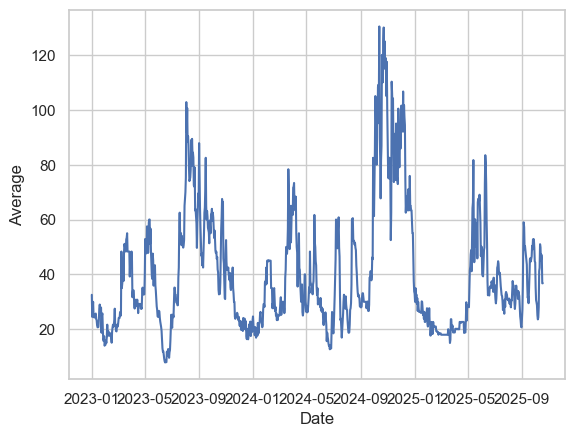

In [835]:
sns.lineplot(x = 'Date', y = 'Average', data = tomato)

In [2]:
import pandas as pd
my_data = pd.read_csv('final_dataset_with_season.csv')

In [3]:
my_data= my_data.rename(columns = {'Average':'Average_price'})

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15780 non-null  int64  
 1   Date             15780 non-null  object 
 2   commodity        15780 non-null  object 
 3   Average_price    15780 non-null  float64
 4   supply_Volume    15780 non-null  float64
 5   temperature_avg  15780 non-null  float64
 6   precipitation    15780 non-null  float64
 7   wind_speed       15780 non-null  float64
 8   air_pressure     15780 non-null  float64
 9   rainfall_mm      15780 non-null  float64
 10  diesel           15780 non-null  float64
 11  USD_to_NPR       15780 non-null  float64
 12  Season           15780 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.6+ MB


In [5]:
my_data = my_data.drop(columns = 'Unnamed: 0')

In [6]:
my_data

Date     commodity  Average_price  supply_Volume  \
0      2023-01-01  Brinjal_Long          45.00         9600.0   
1      2023-01-01      Broccoli          55.00         9475.0   
2      2023-01-01       Cabbage          22.33        39450.0   
3      2023-01-01   Lady_Finger          85.00        14000.0   
4      2023-01-01  Mustard_Leaf          35.00         9660.0   
...           ...           ...            ...            ...   
15775  2025-10-18  Sponge_Gourd         105.00         5555.0   
15776  2025-10-18        Squash          15.00        16479.0   
15777  2025-10-18  Sweet_Potato          75.00          200.0   
15778  2025-10-18          Taro          70.00          150.0   
15779  2025-10-18  Tomato_Small          36.75        21550.0   

       temperature_avg  precipitation  wind_speed  air_pressure  rainfall_mm  \
0                  9.6            0.0         6.2        1022.4          0.2   
1                  9.6            0.0         6.2        1022.4          0.2   
2                  9.6            0.0         6.2        1022.4          0.2   
3                  9.6            0.0         6.2        1022.4          0.2   
4                  9.6            0.0         6.2        1022.4          0.2   
...                ...            ...         ...           ...          ...   
15775             19.8            0.0         4.8        1017.2          0.9   
15776             19.8            0.0         4.8        1017.2          0.9   
15777             19.8            0.0         4.8        1017.2          0.9   
15778             19.8            0.0         4.8        1017.2          0.9   
15779             19.8            0.0         4.8        1017.2          0.9   

       diesel  USD_to_NPR  Season  
0       172.0      130.54  Winter  
1       172.0      130.54  Winter  
2       172.0      130.54  Winter  
3       172.0      130.54  Winter  
4       172.0      130.54  Winter  
...       ...         ...     ...  
15775   145.0      139.18  Autumn  
15776   145.0      139.18  Autumn  
15777   145.0      139.18  Autumn  
15778   145.0      139.18  Autumn  
15779   145.0      139.18  Autumn  

[15780 rows x 12 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


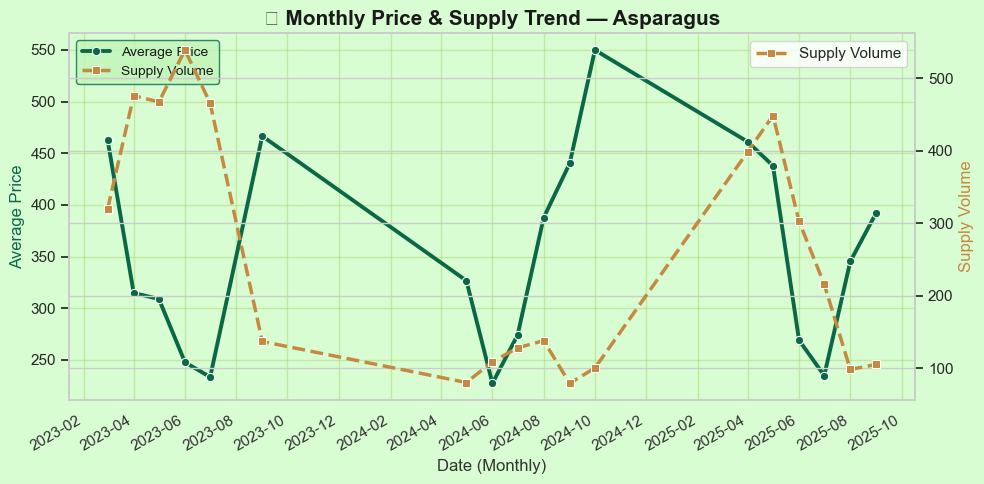

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


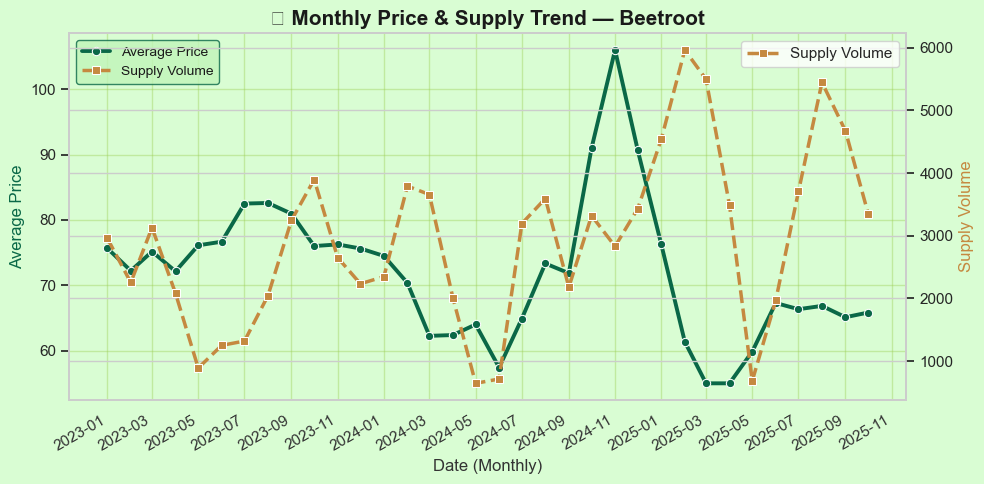

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


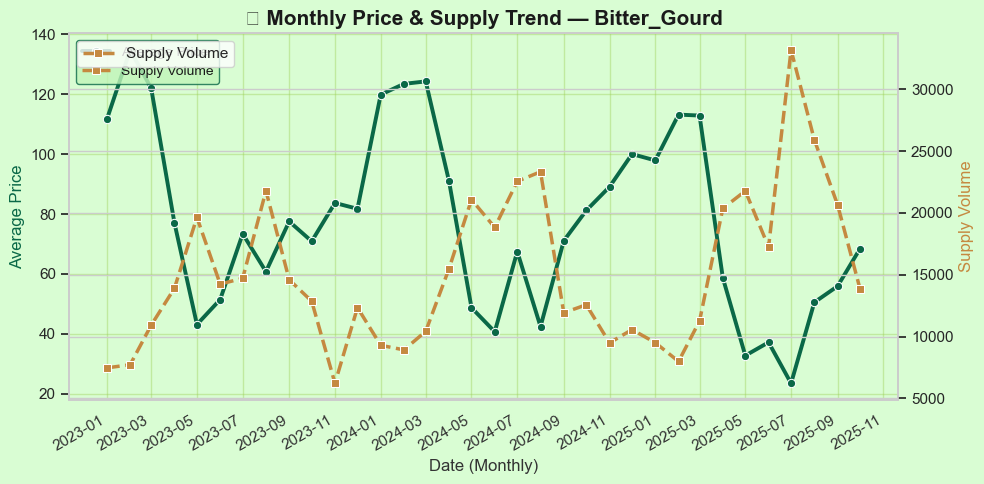

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


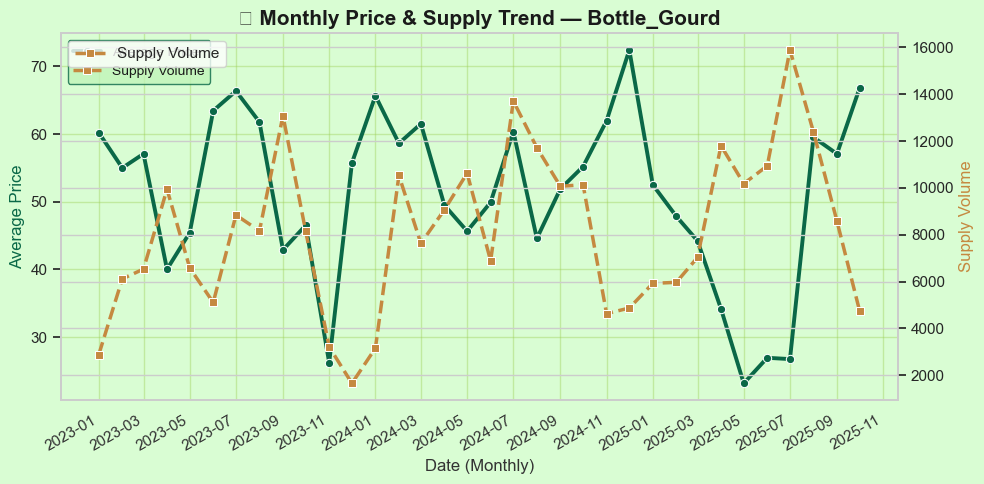

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


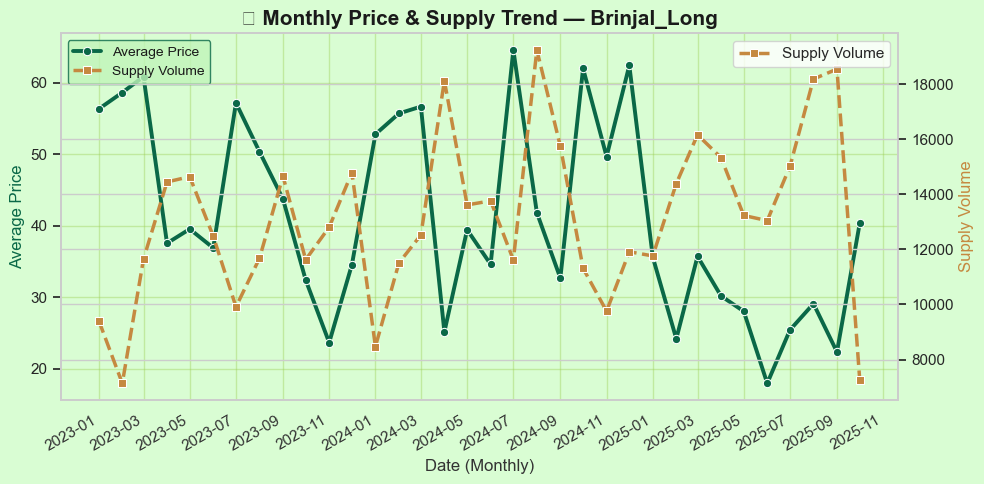

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


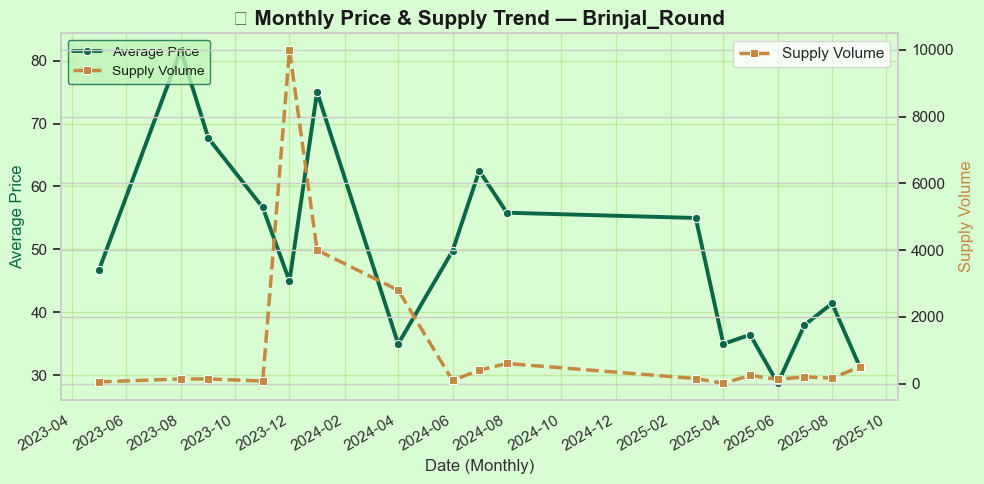

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


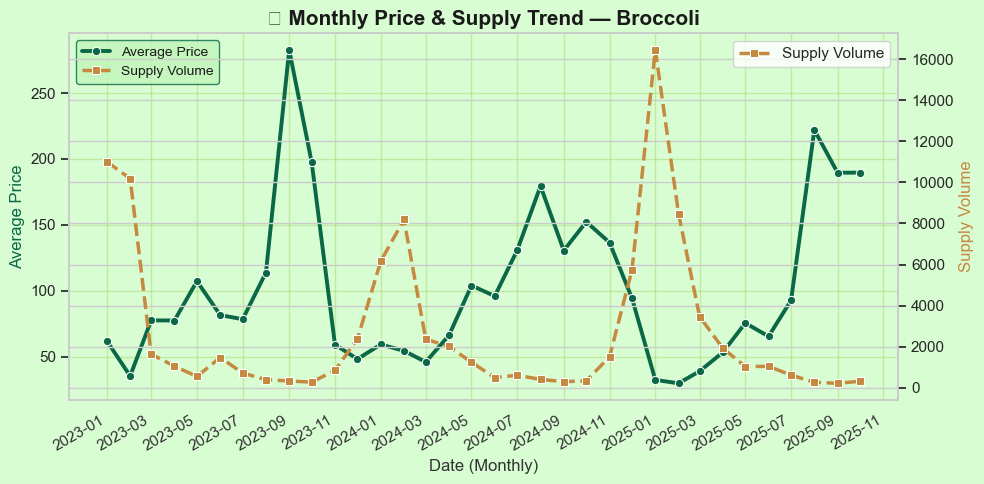

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


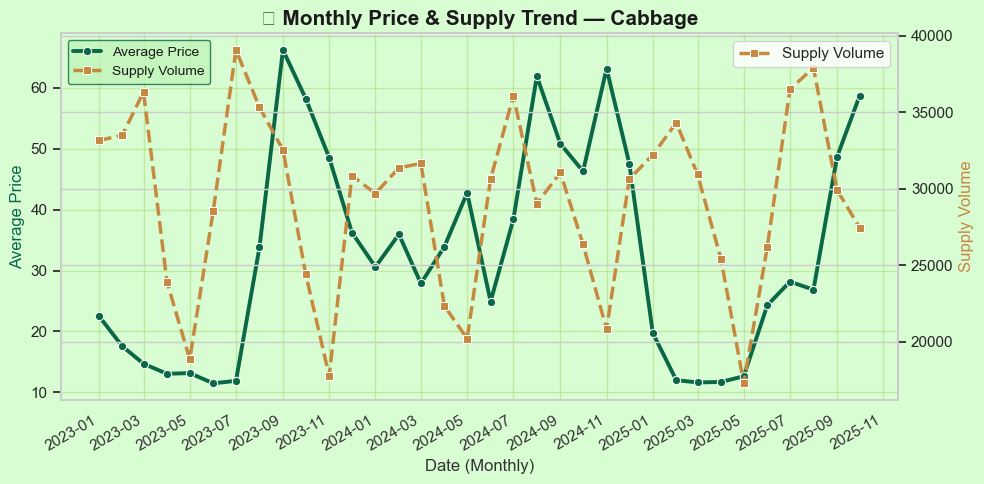

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


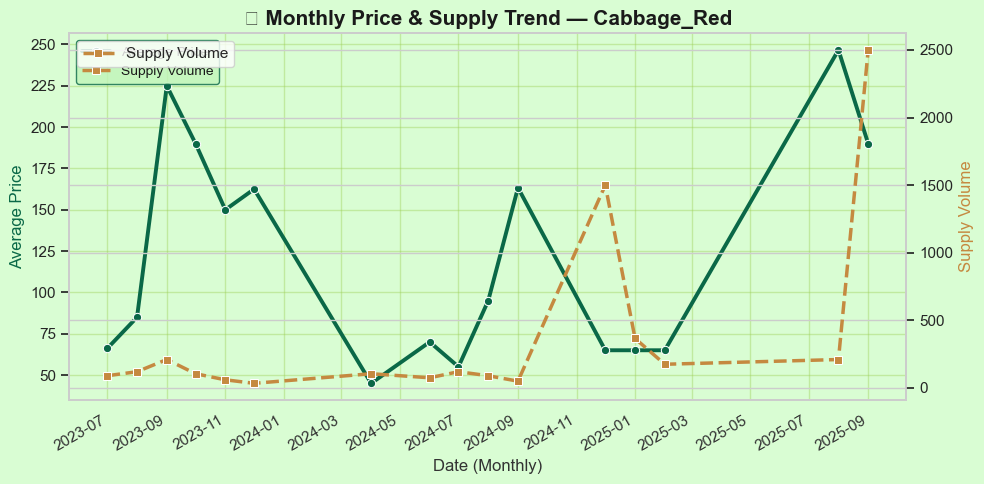

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


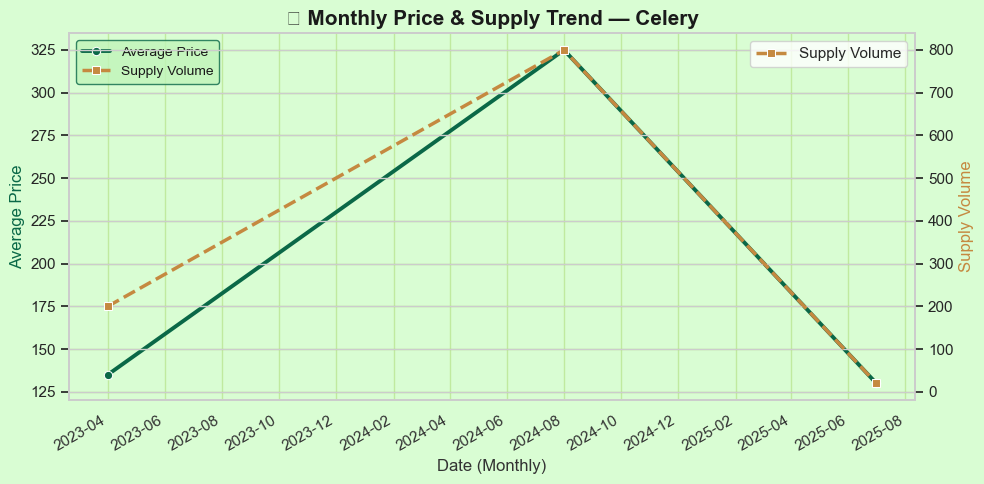

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


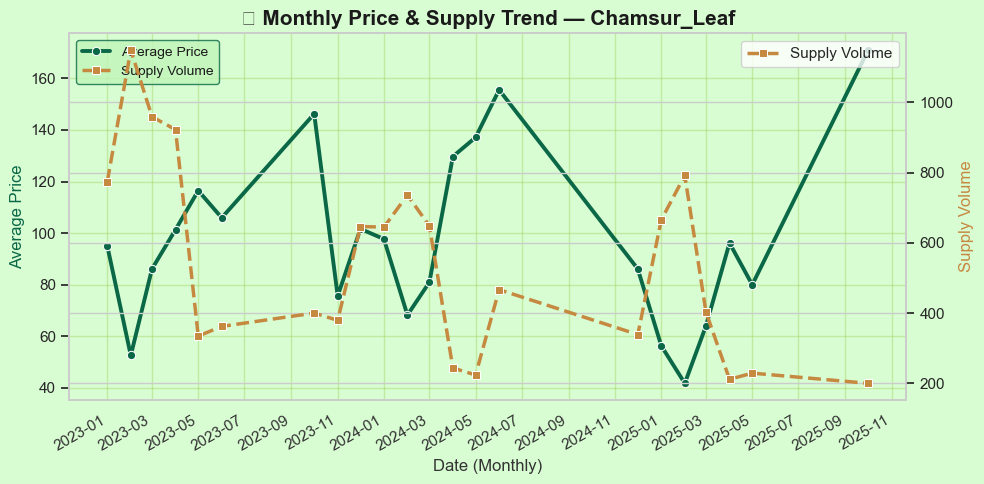

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


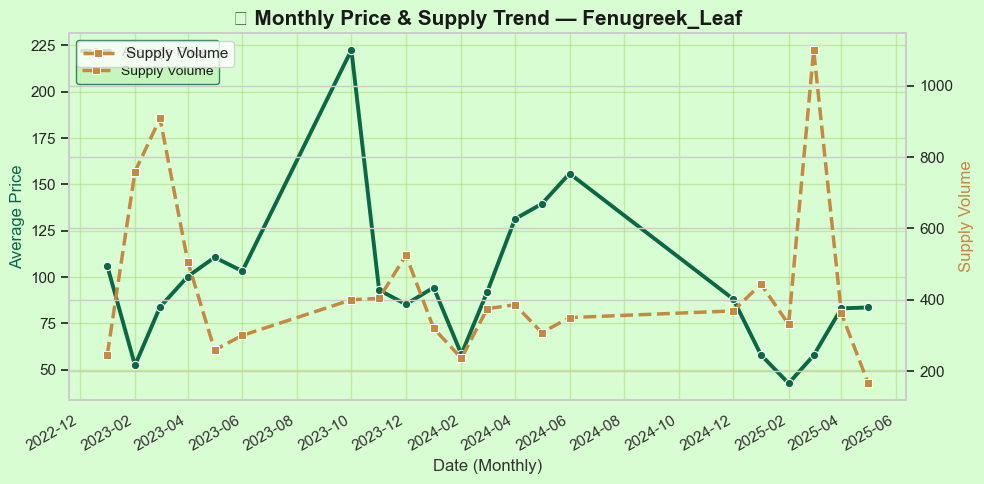

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


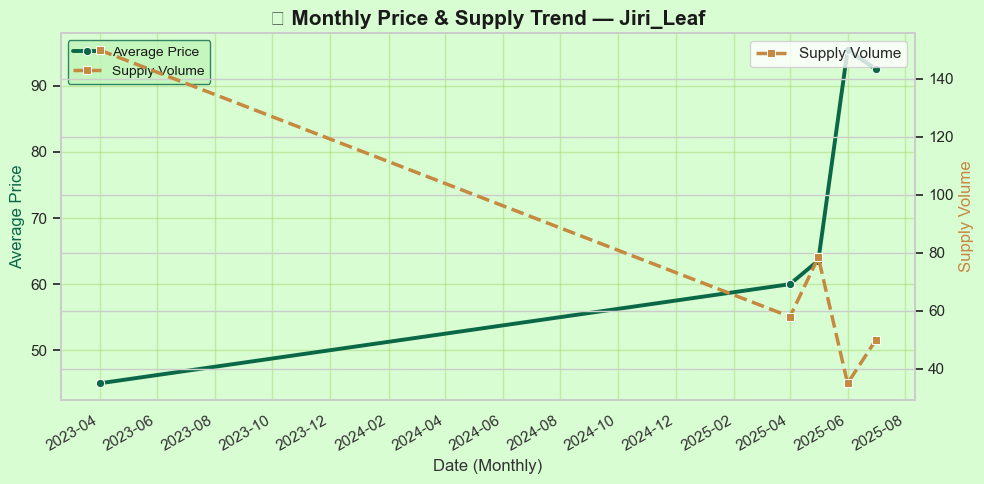

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


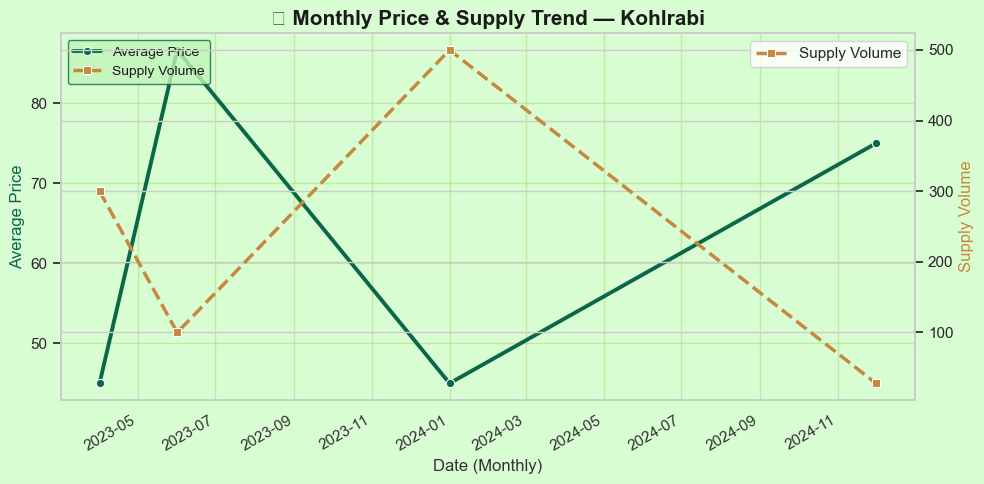

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


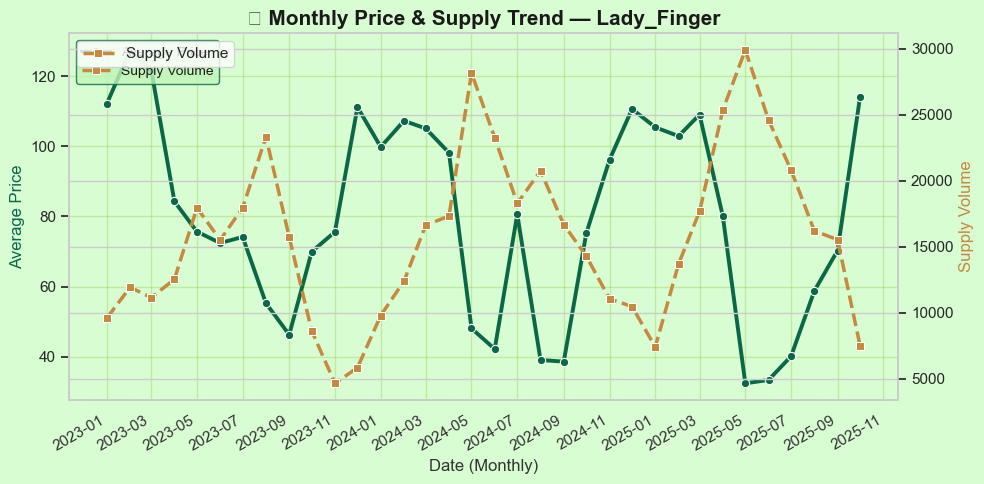

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


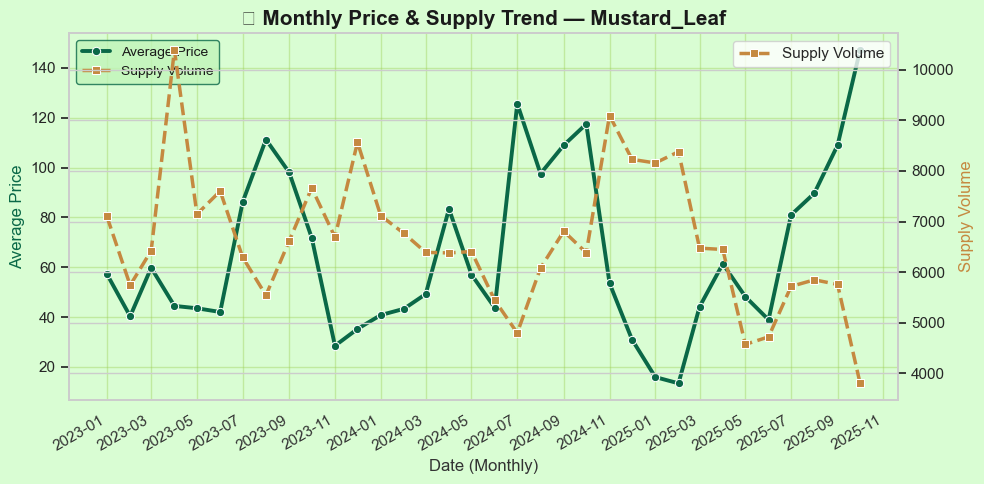

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


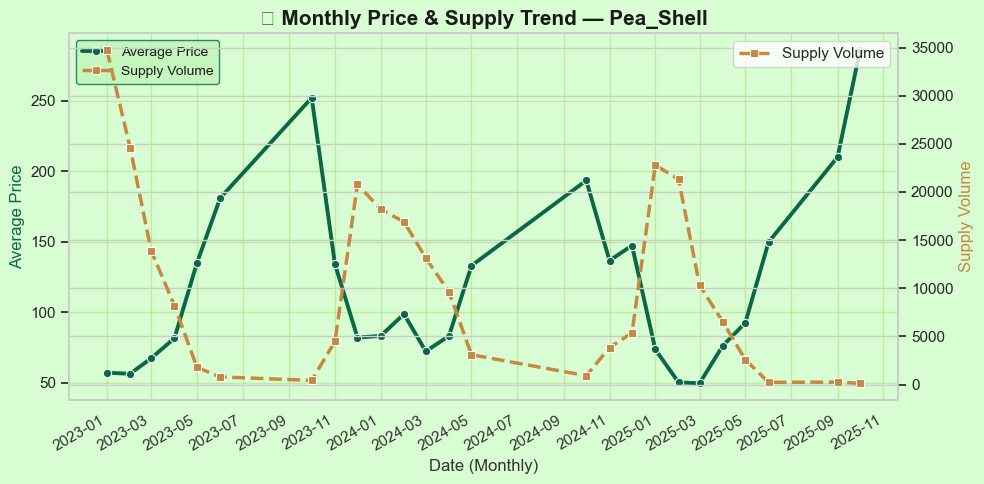

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


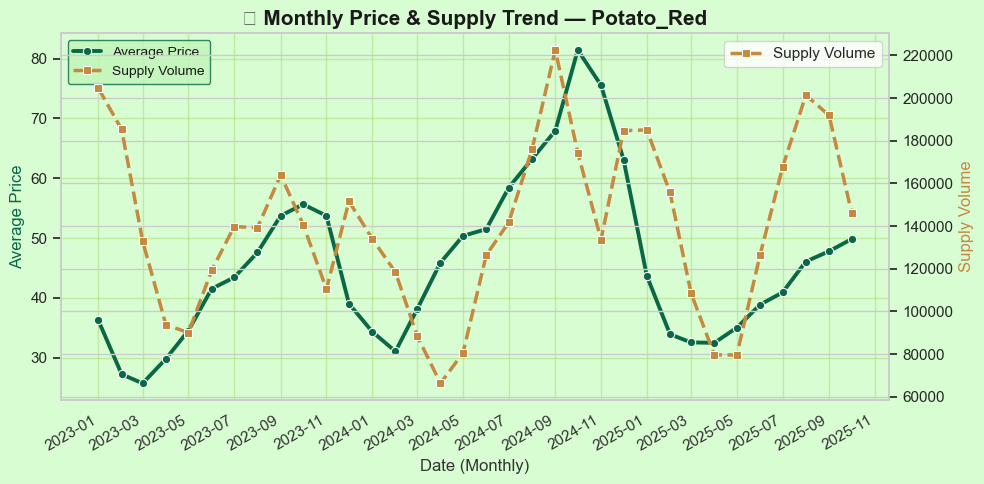

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


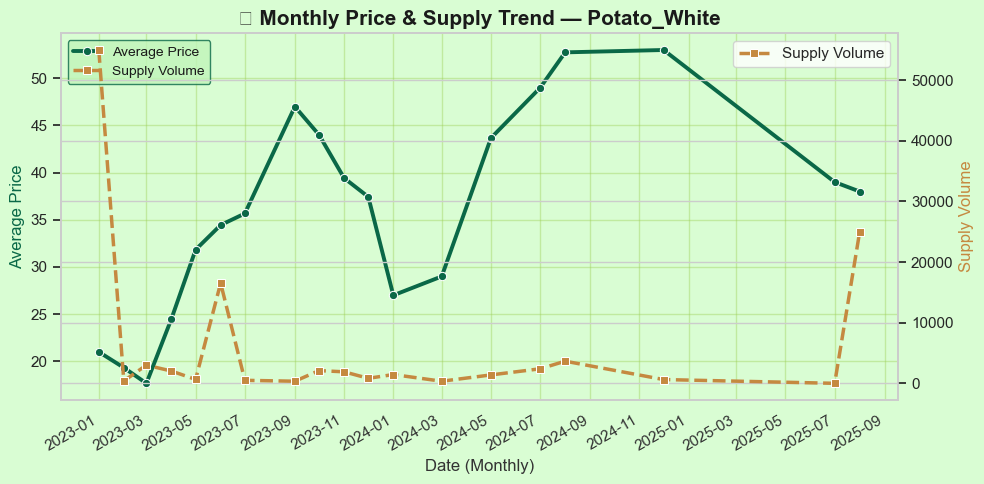

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


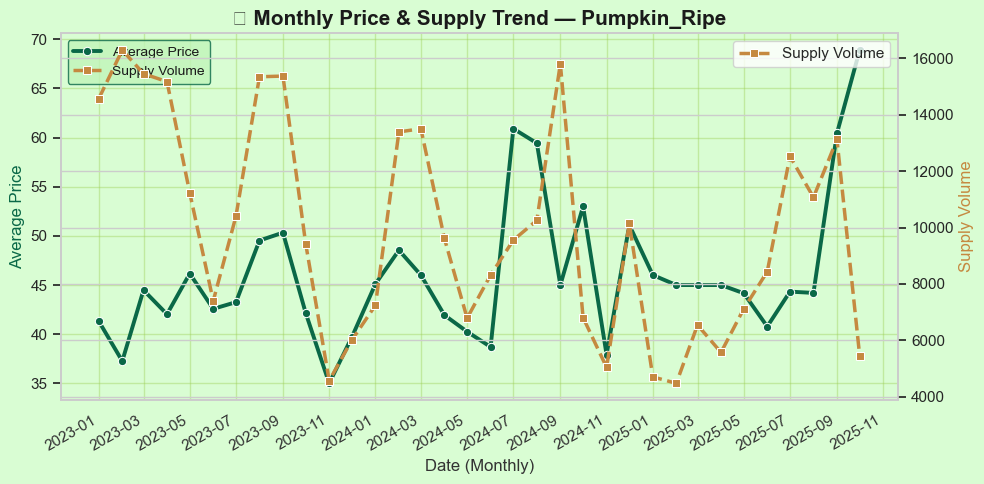

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


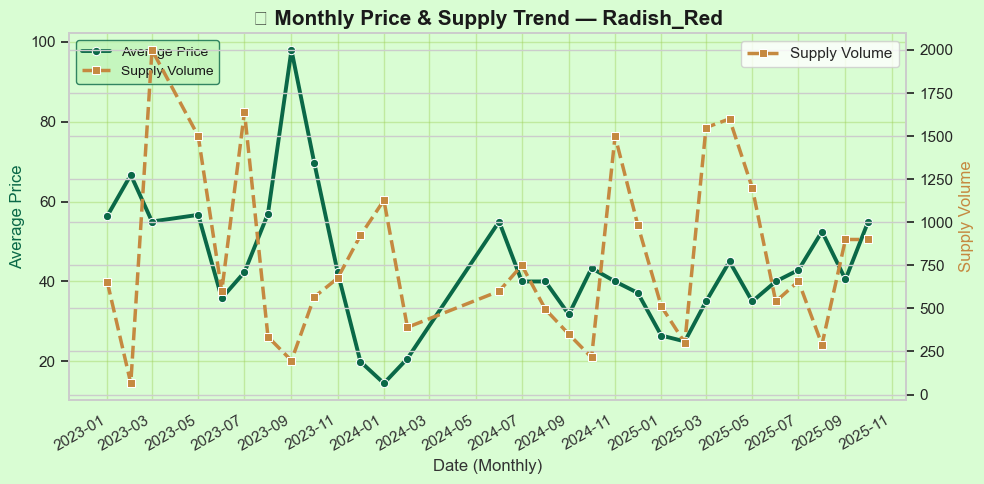

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


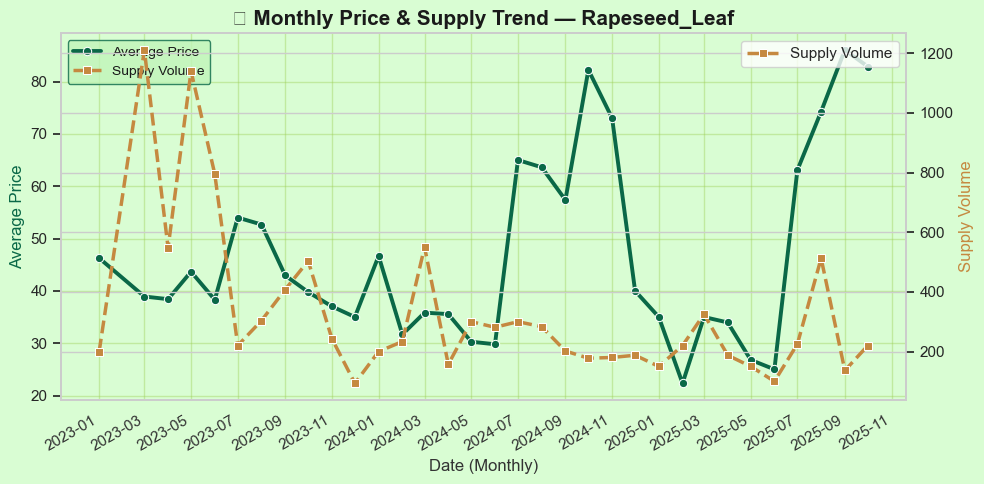

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


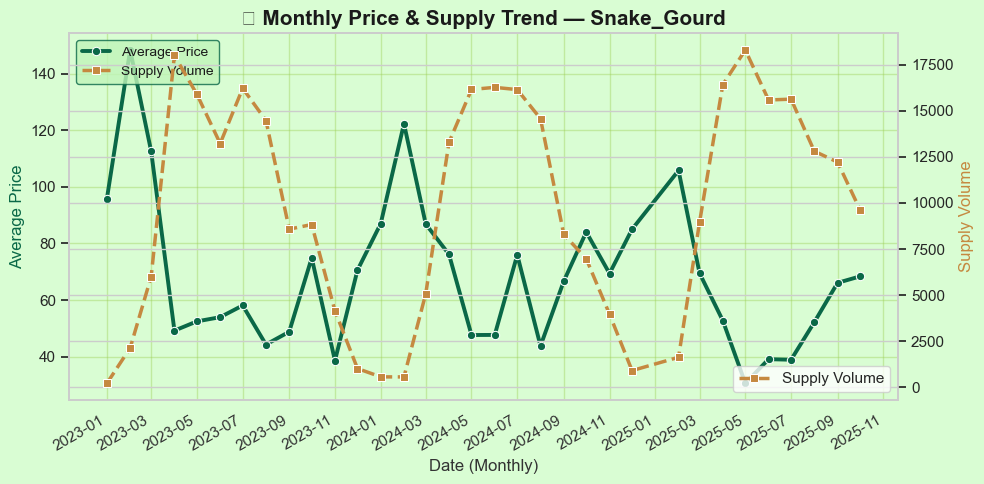

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


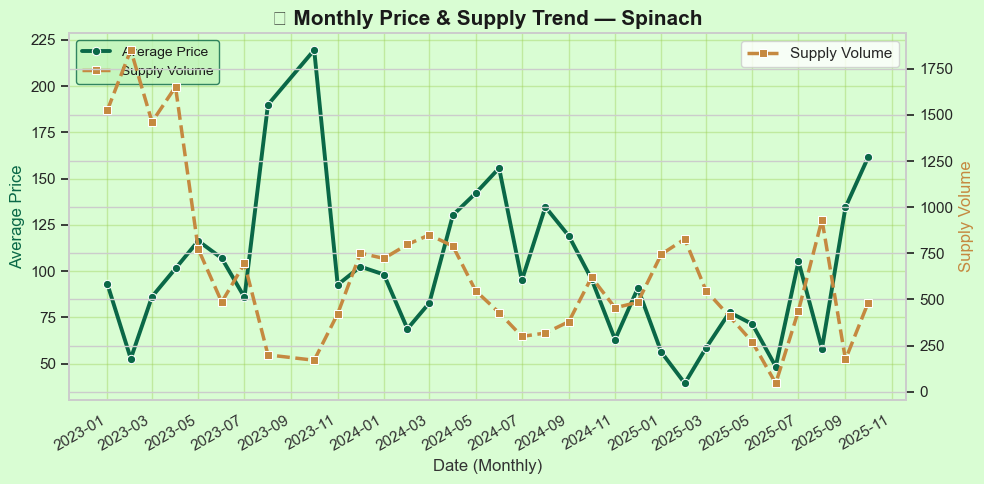

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


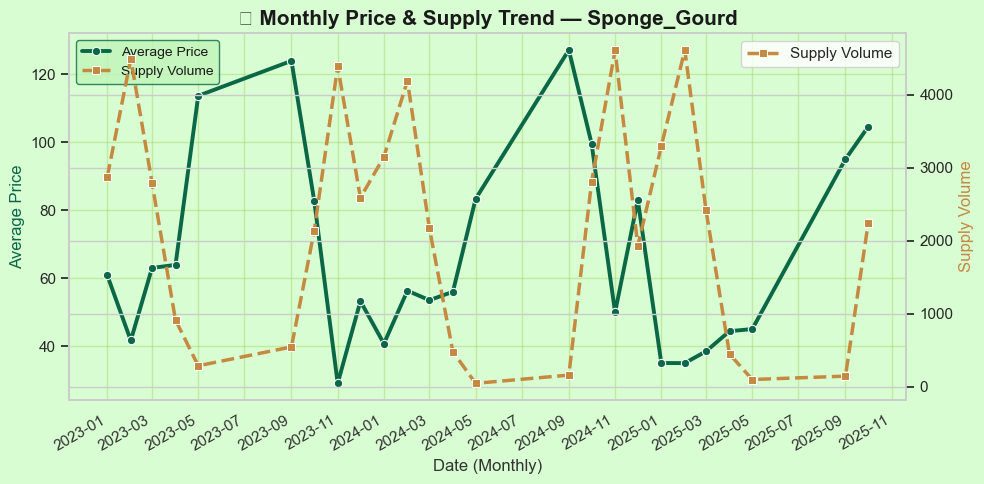

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


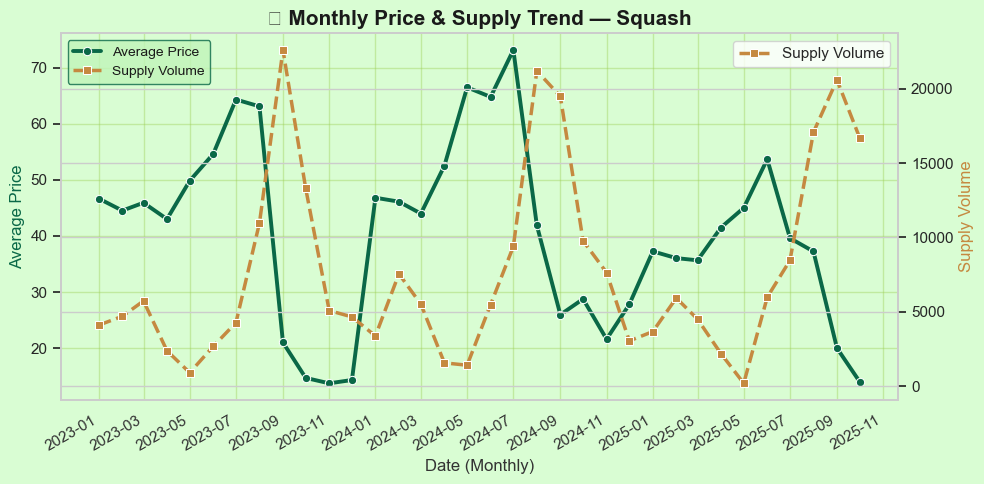

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


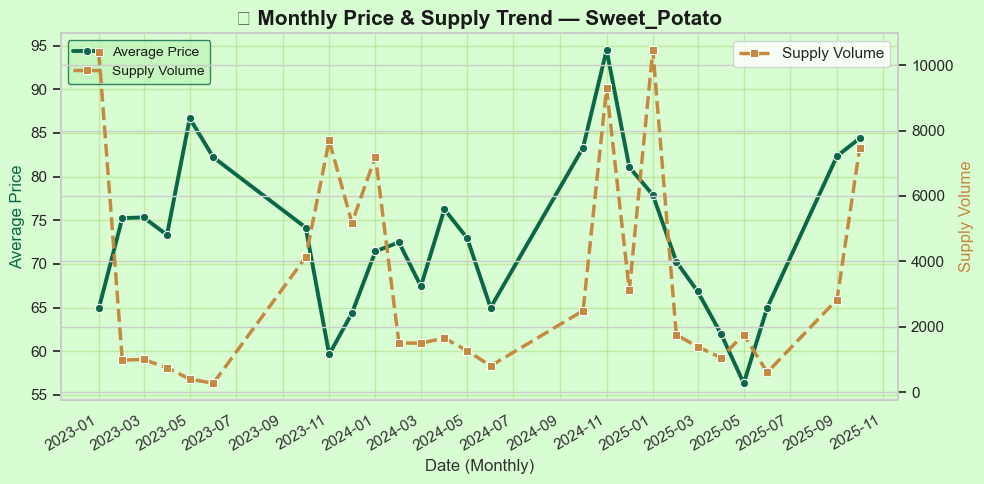

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


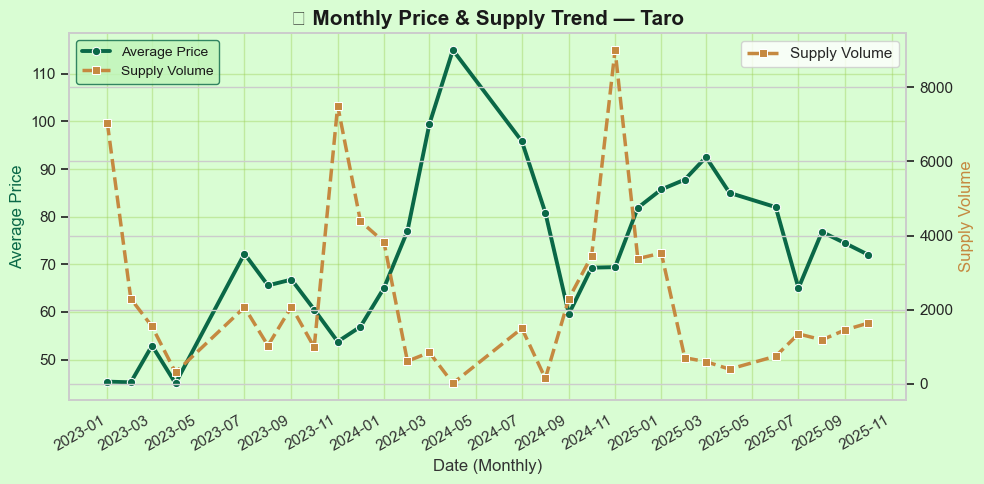

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


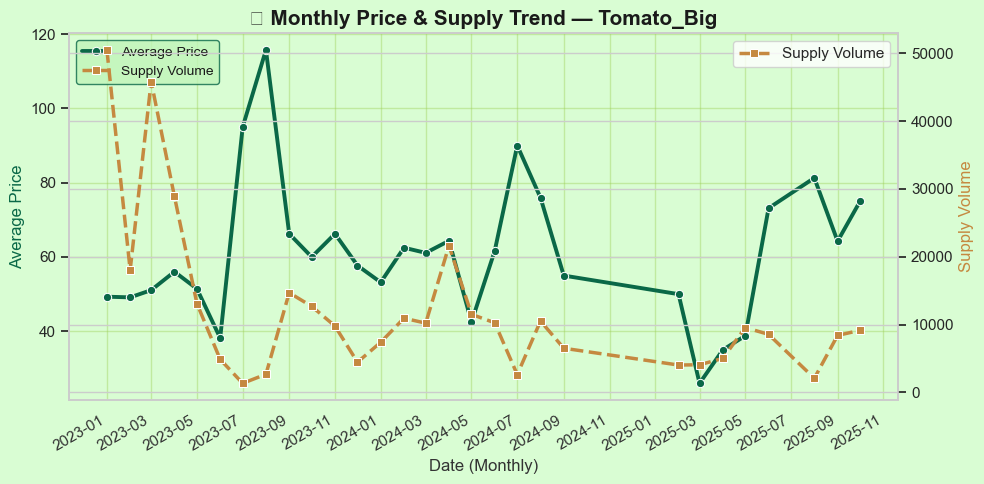

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


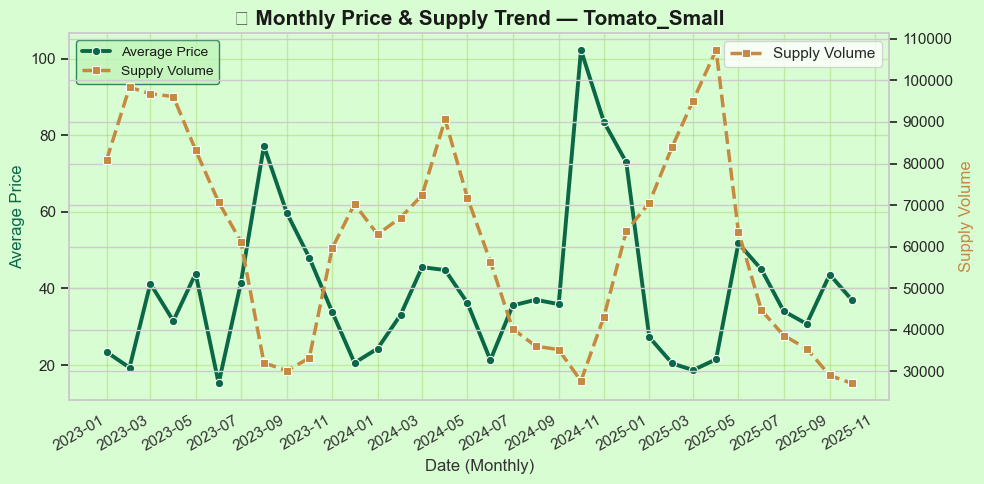

C:\Users\User\AppData\Local\Temp\ipykernel_42412\3906776515.py:72: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


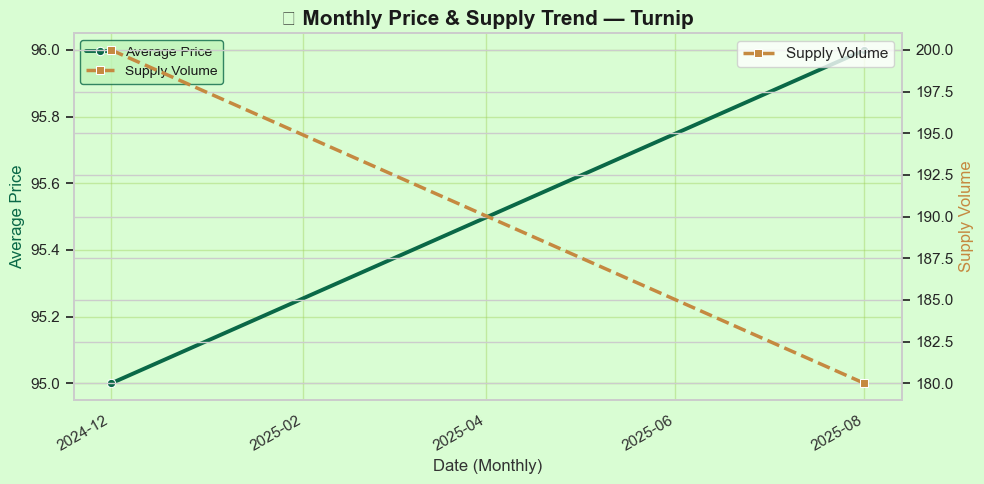

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Prepare data
df = my_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
commodities = sorted(df['commodity'].unique())

# Custom Seaborn style
sns.set_theme(style="whitegrid")

for com in commodities:
    sub = df[df['commodity'] == com].copy()
    monthly = (
        sub.set_index('Date')
           .resample('MS')
           .agg({'Average_price': 'mean', 'supply_Volume': 'mean'})
           .dropna()
           .reset_index()
    )

    if monthly.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # 🌿 Light green background
    light_green = "#d9fdd3"   # soft mint green
    fig.patch.set_facecolor(light_green)
    ax1.set_facecolor(light_green)
    ax2.set_facecolor(light_green)

    # ✨ Line colors: green and gold
    sns.lineplot(
        data=monthly, x='Date', y='Average_price',
        ax=ax1, color='#0A6847', linewidth=2.8, marker='o', label='Average Price'
    )
    sns.lineplot(
        data=monthly, x='Date', y='supply_Volume',
        ax=ax2, color='#C58940', linewidth=2.5, linestyle='--', marker='s', label='Supply Volume'
    )

    # 🏷 Titles and labels
    ax1.set_title(f"🌾 Monthly Price & Supply Trend — {com}",
                  fontsize=15, color='#1a1a1a', weight='bold')
    ax1.set_xlabel("Date (Monthly)", color='#333333', fontsize=12)
    ax1.set_ylabel("Average Price", color='#0A6847', fontsize=12)
    ax2.set_ylabel("Supply Volume", color='#C58940', fontsize=12)

    # 📅 Format x-axis as months
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax1.get_xticklabels(), rotation=30, ha='right', color='#333333')

    # 🧭 Legend styling
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2, labels1 + labels2,
        loc='upper left',
        facecolor='#c0f5b9',
        edgecolor='#0A6847',
        labelcolor='#1a1a1a',
        fontsize=10
    )

    # 💡 Subtle grid
    ax1.grid(True, color='#9BCF53', alpha=0.4)
    plt.tight_layout()
    plt.show()


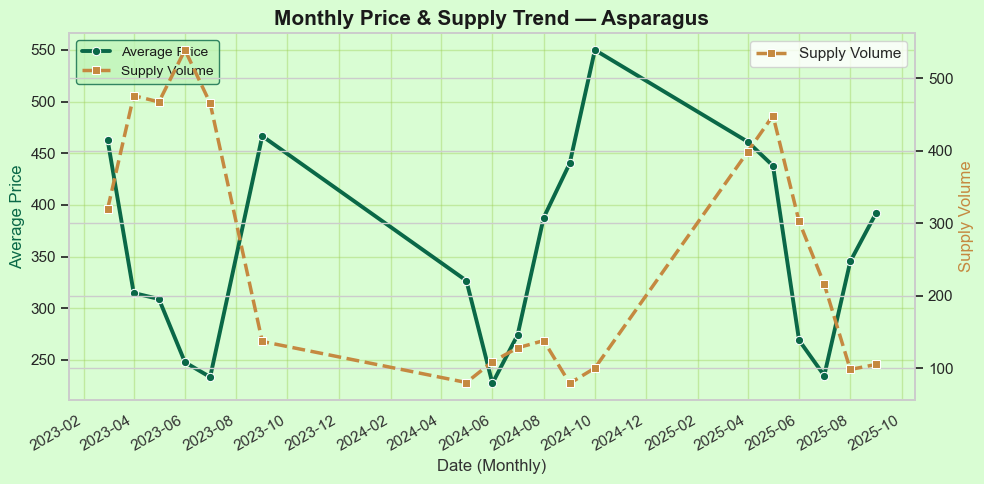

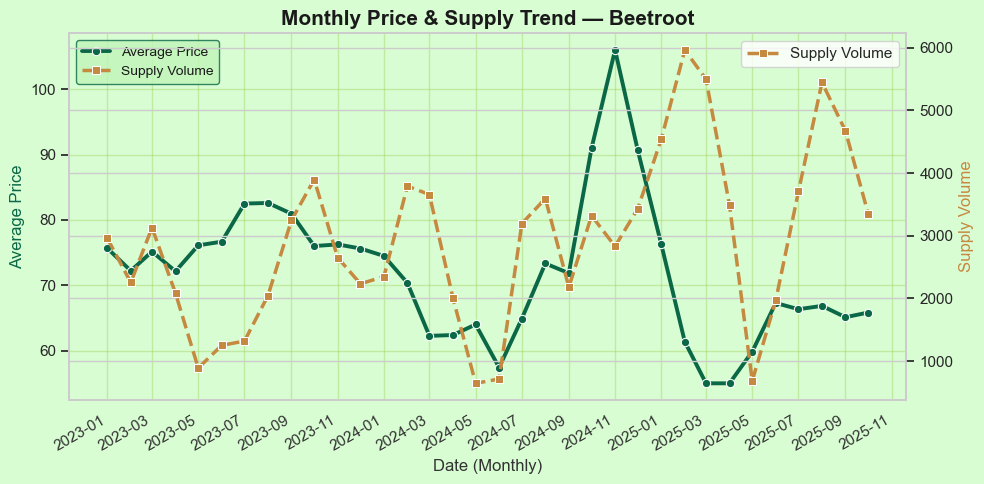

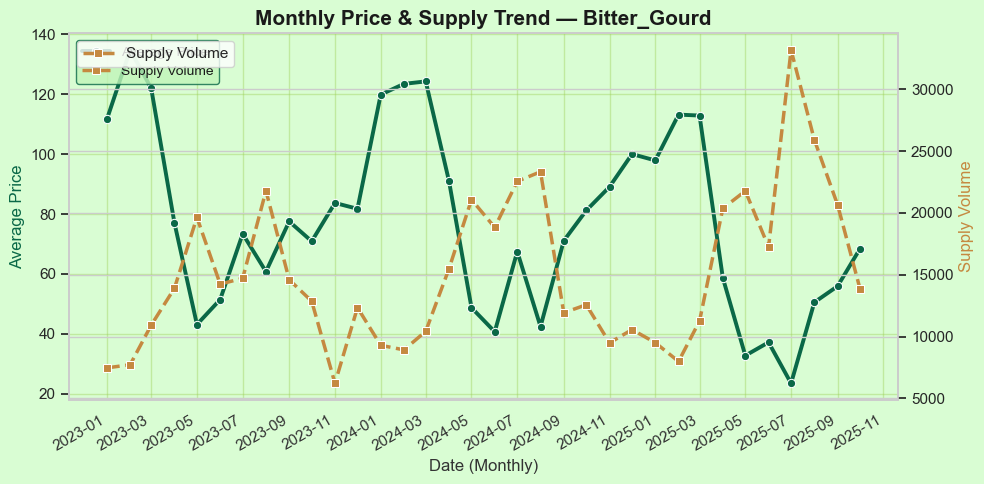

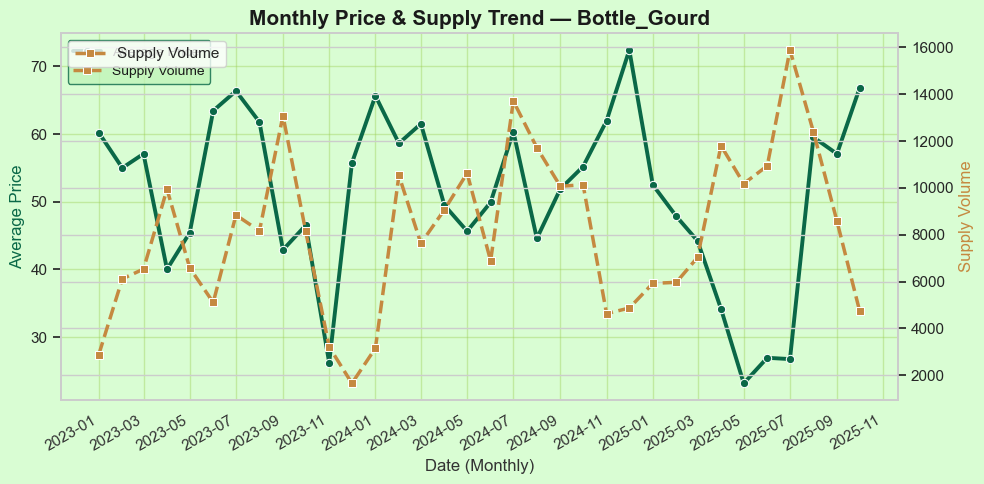

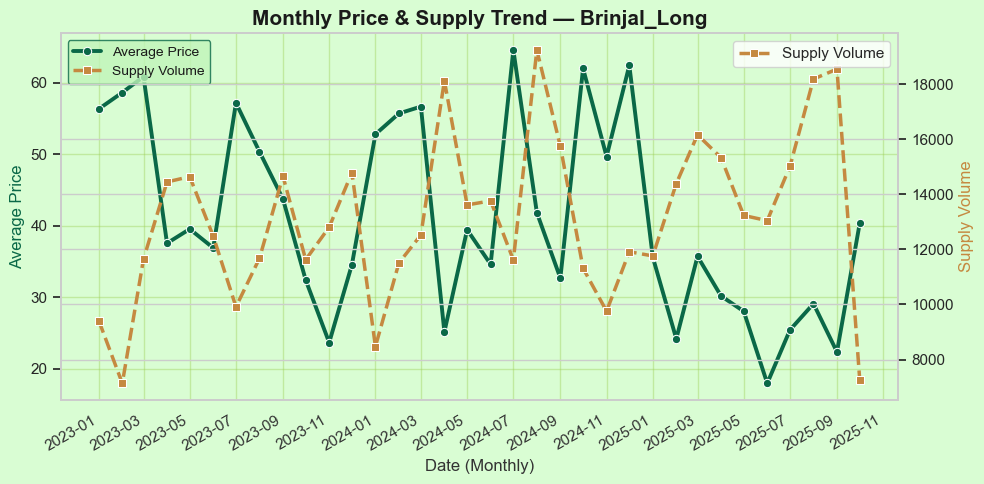

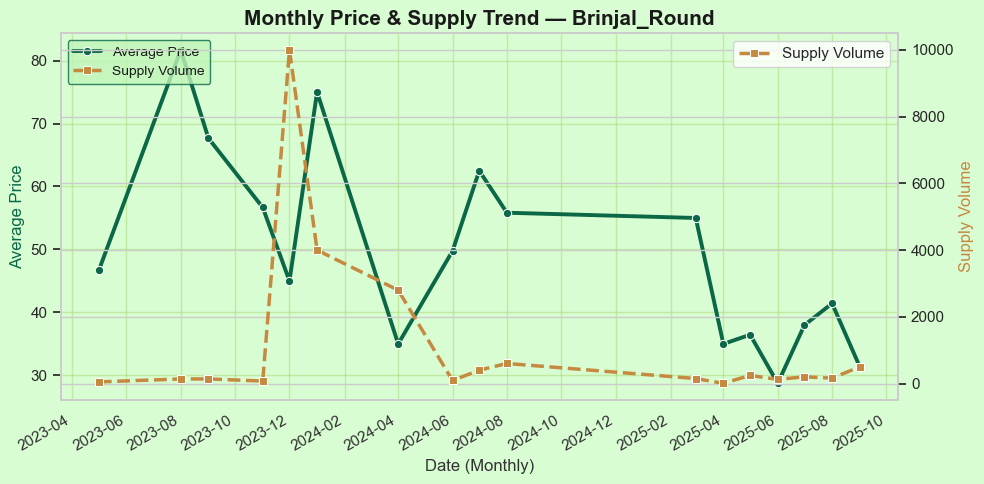

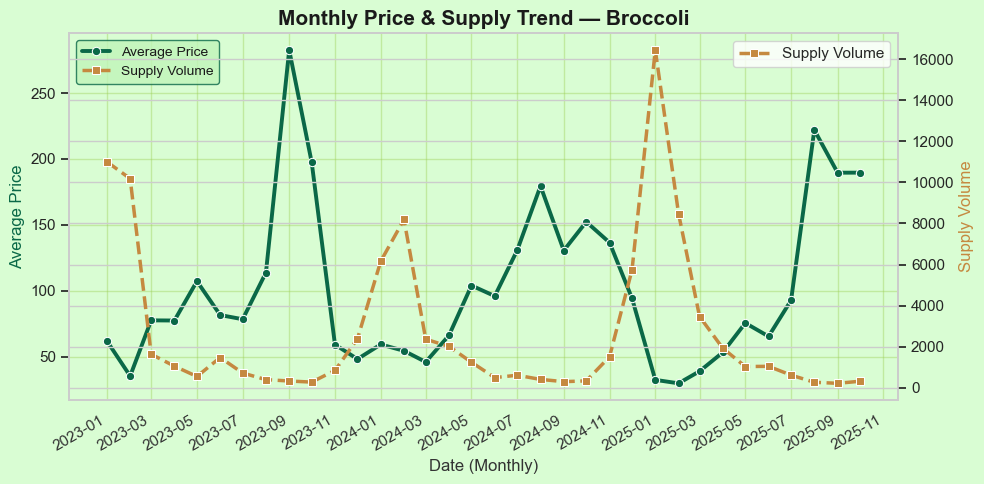

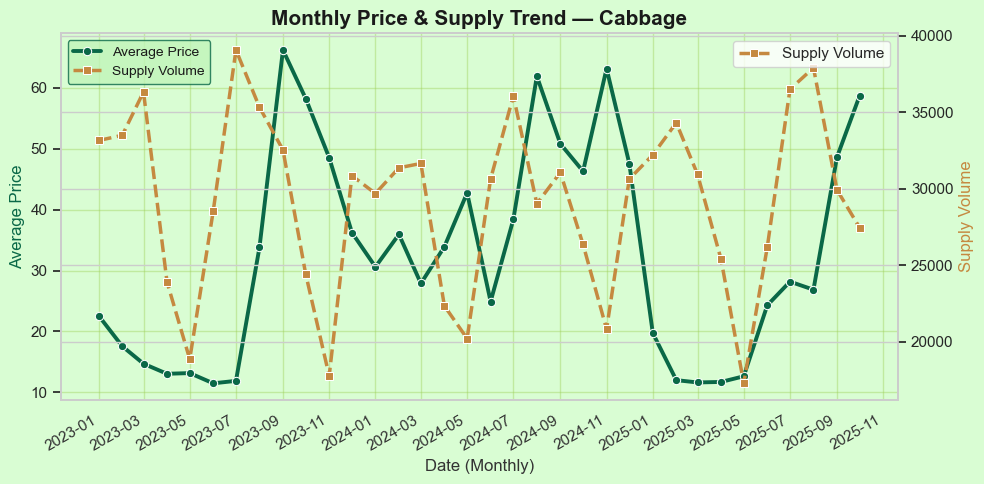

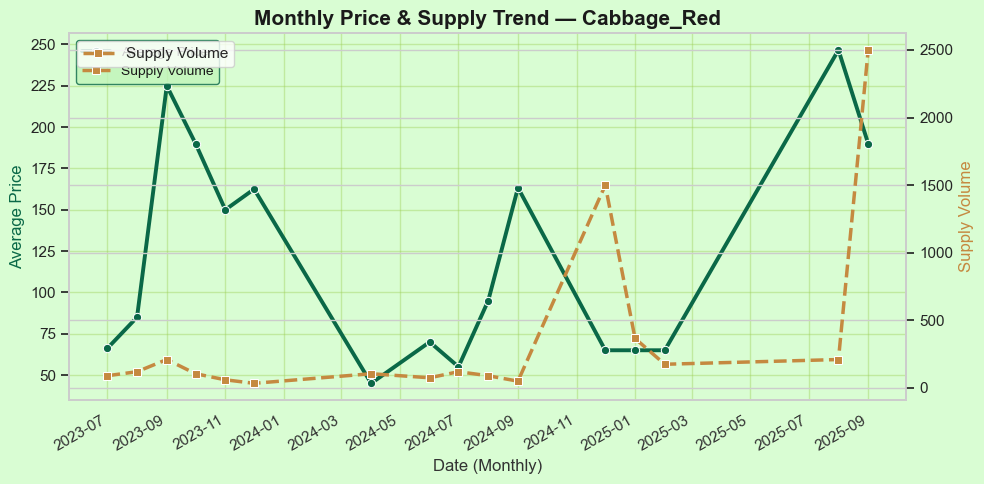

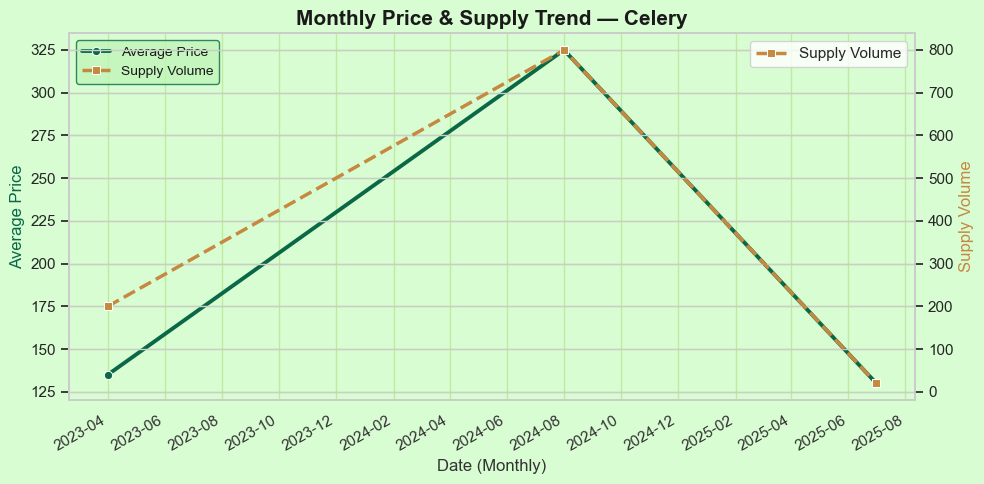

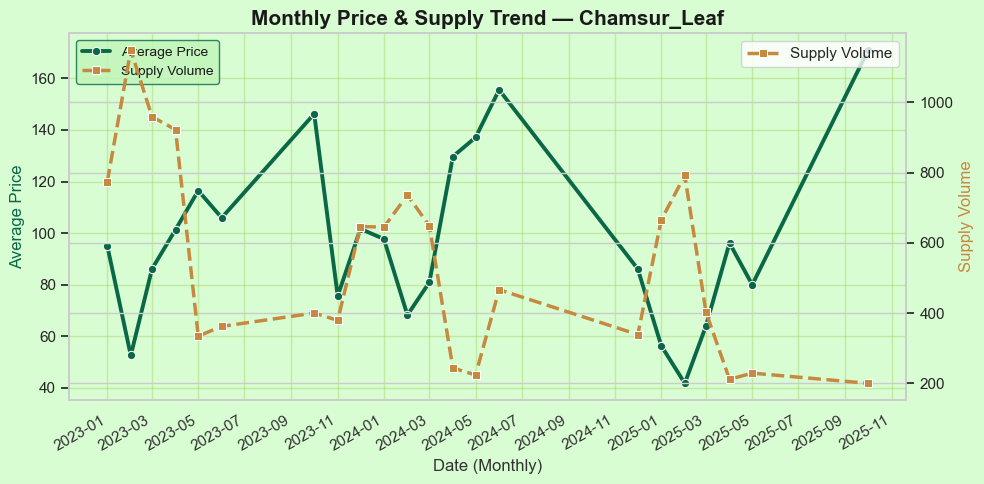

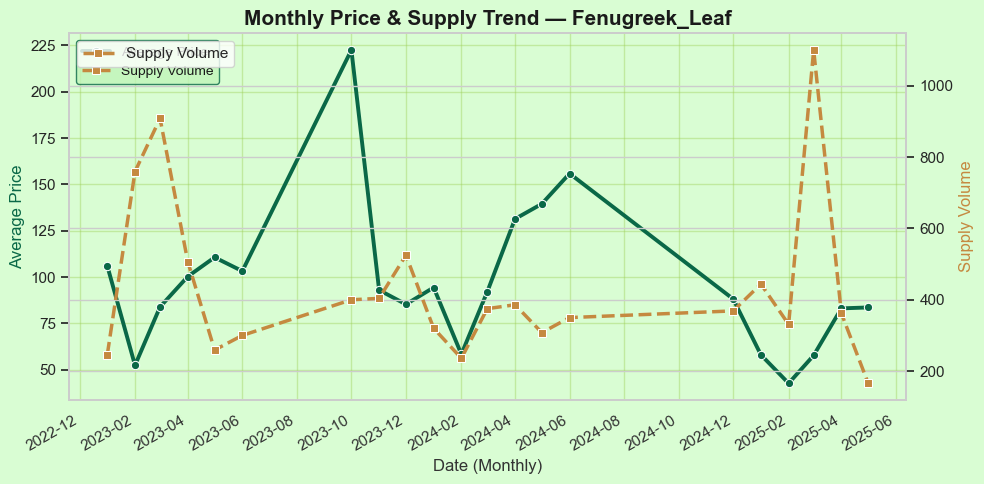

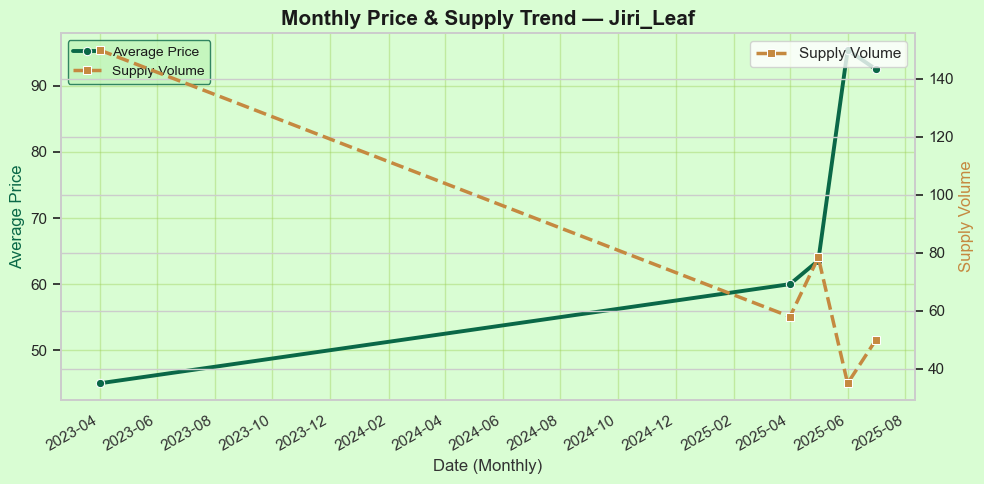

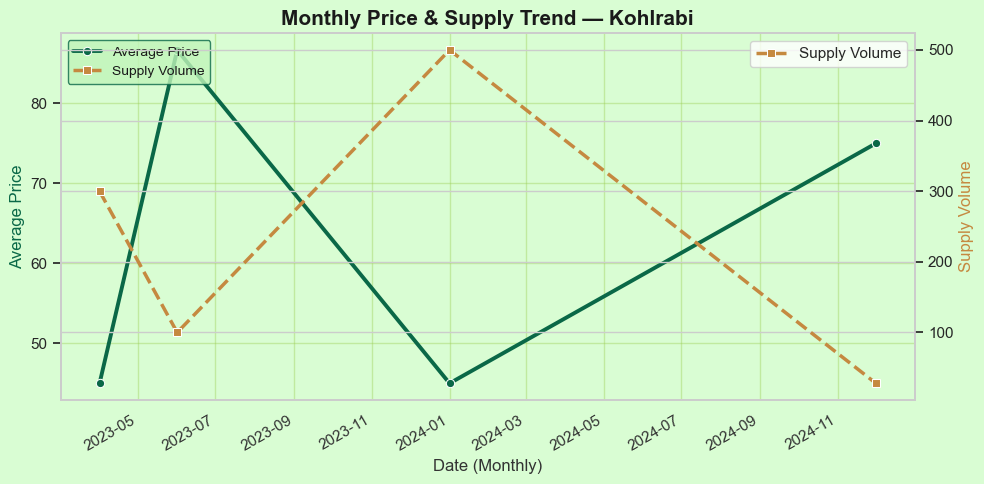

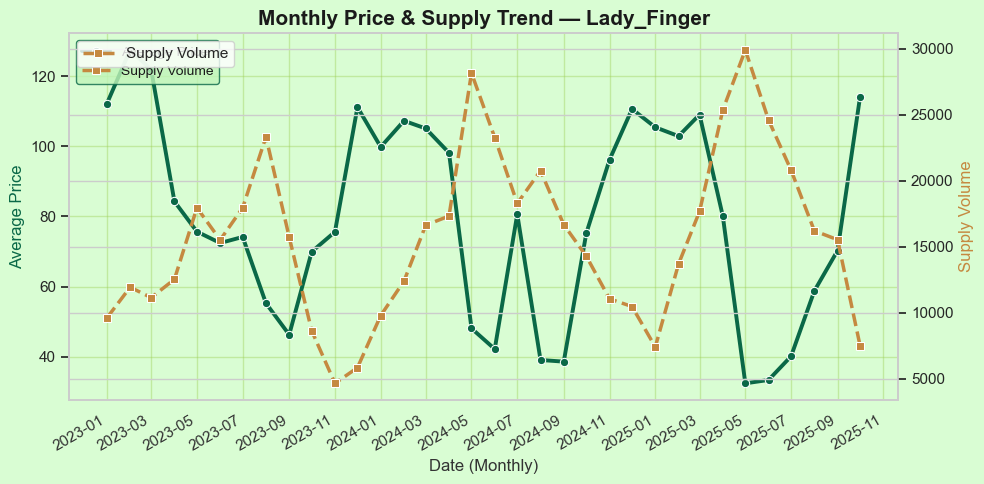

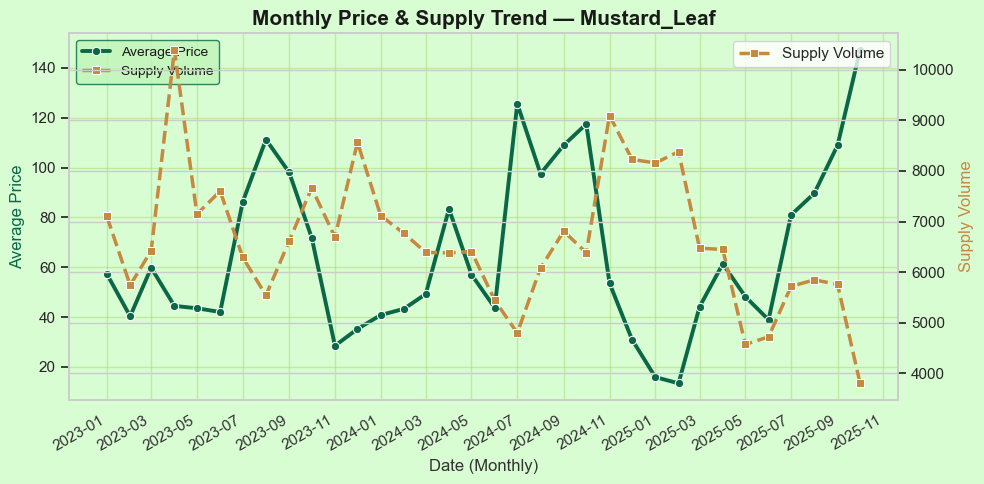

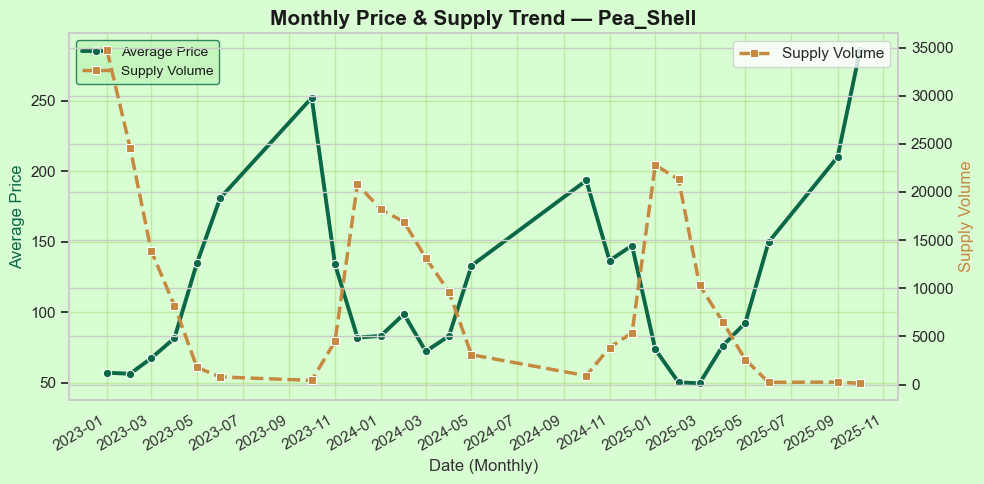

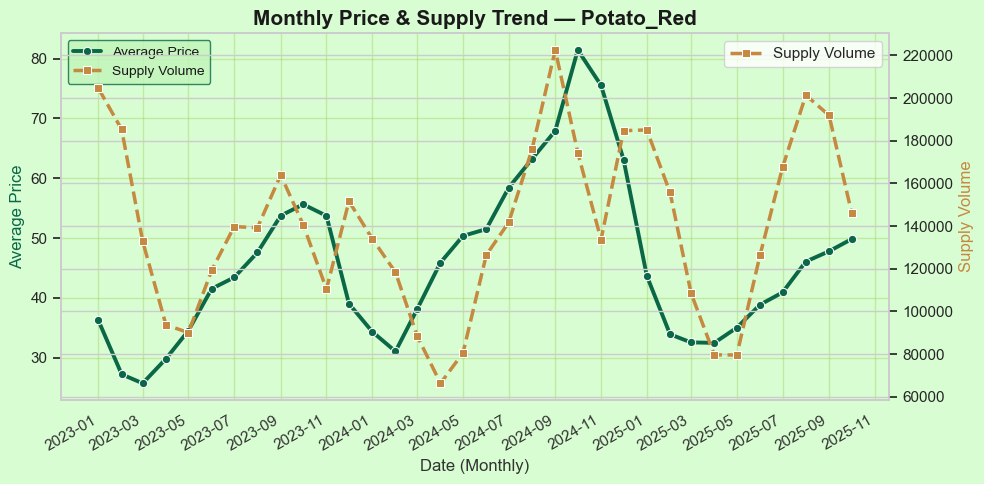

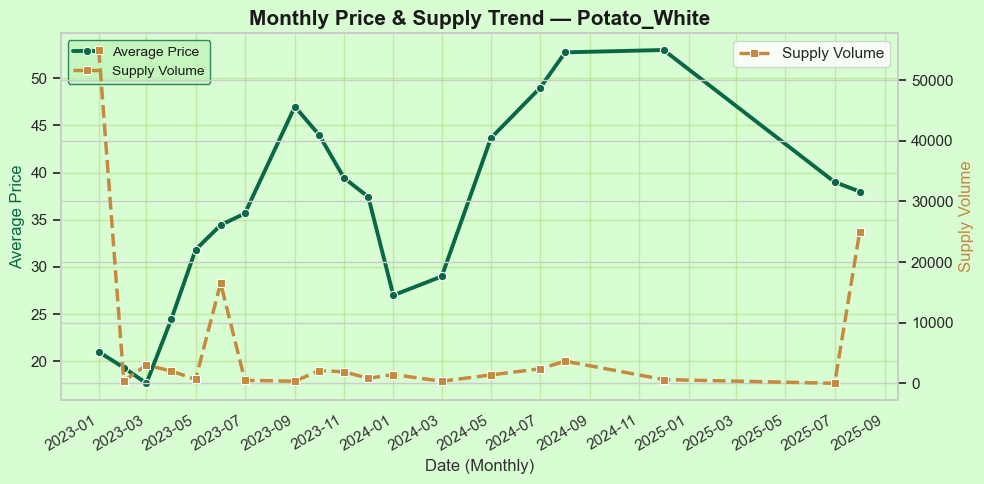

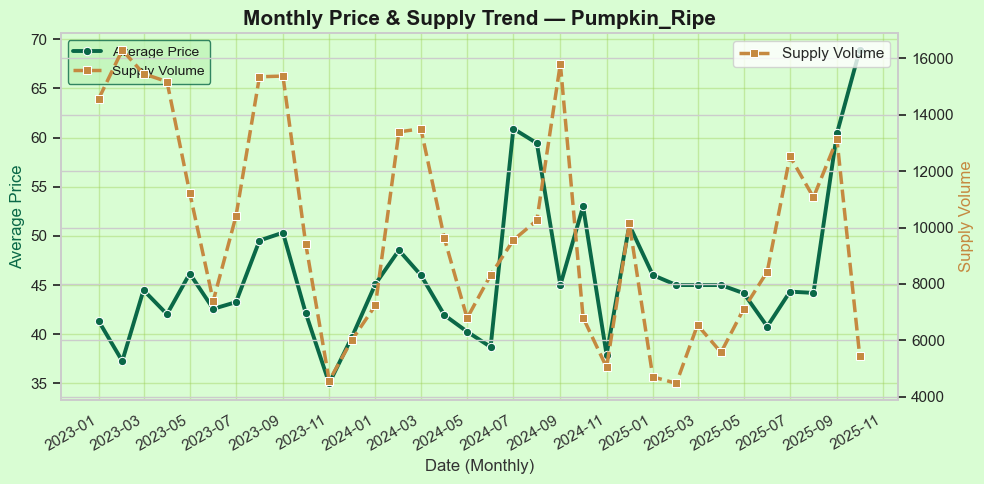

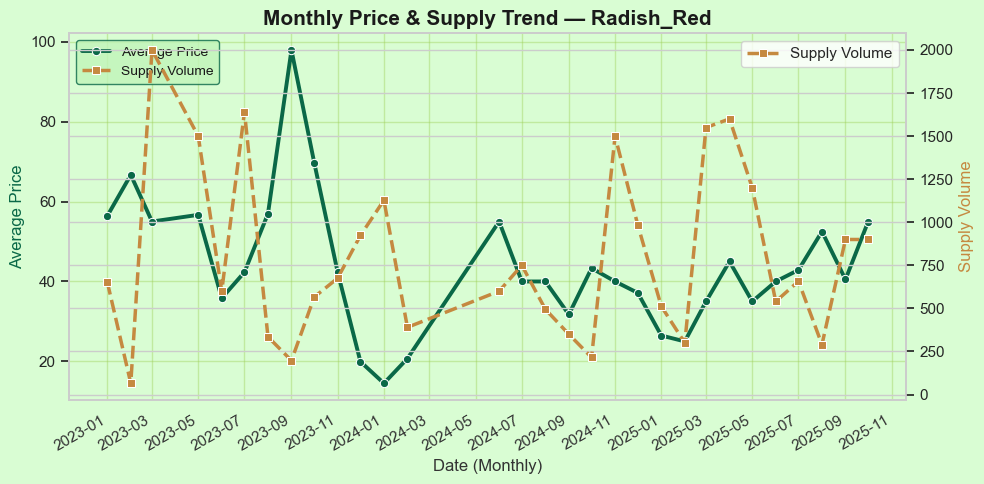

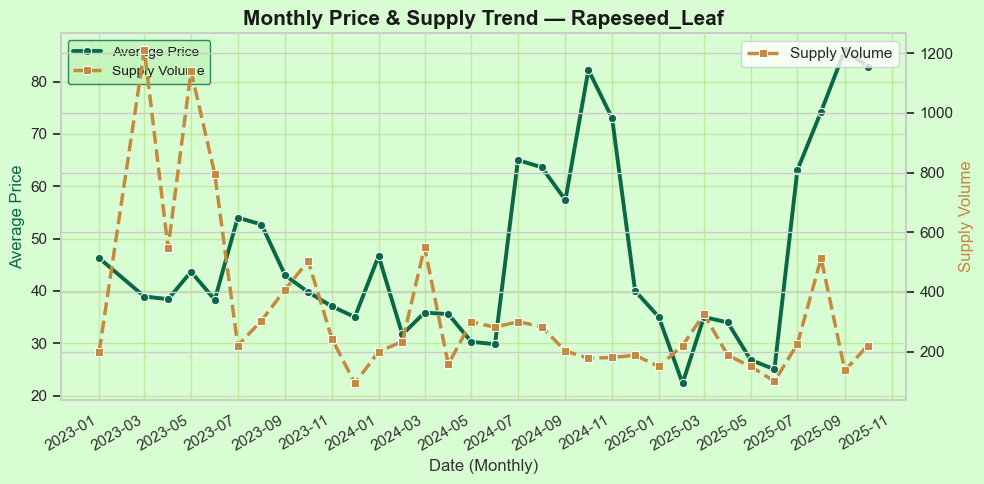

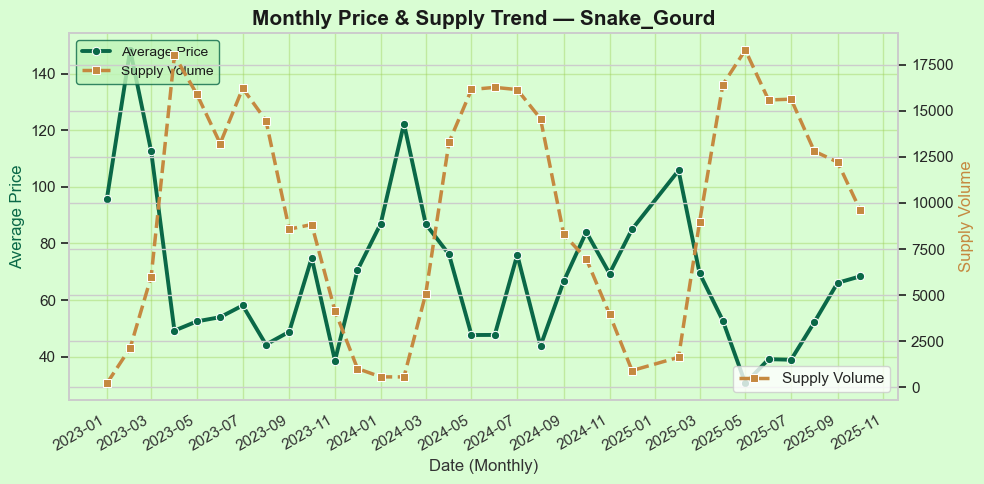

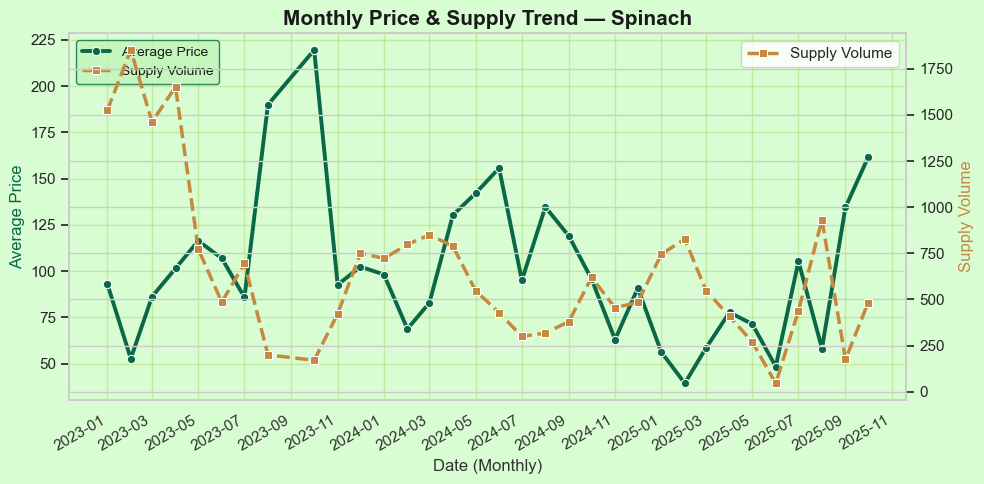

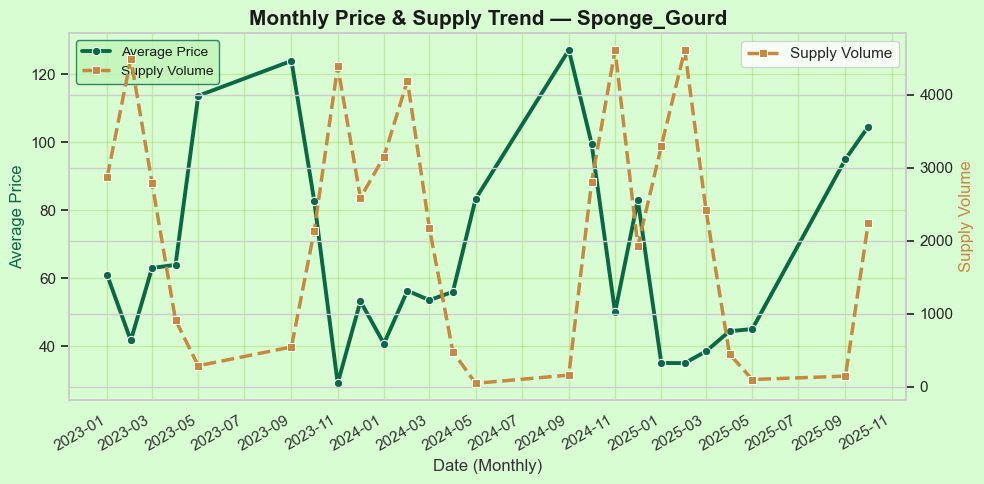

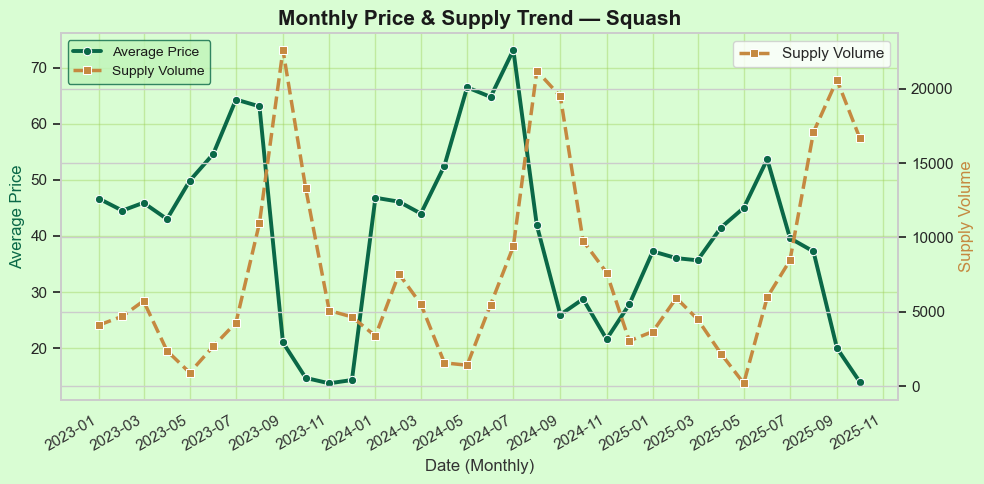

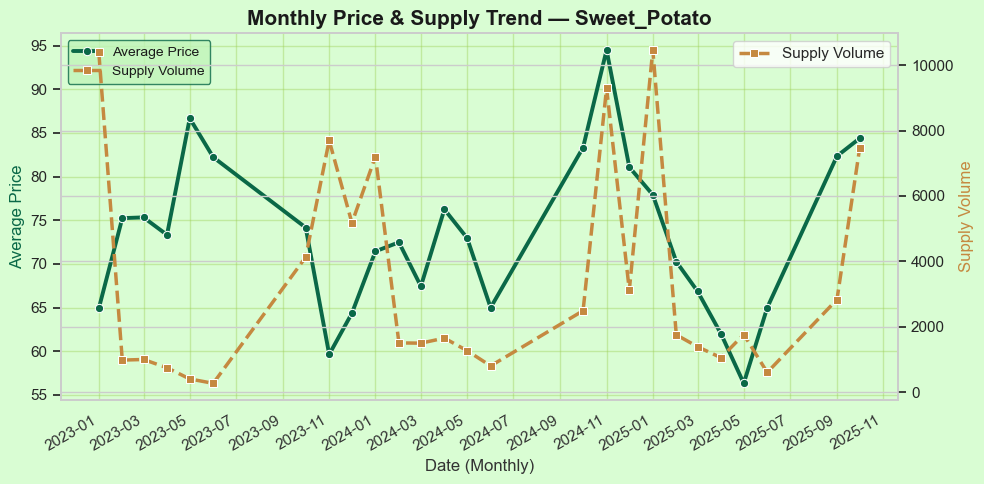

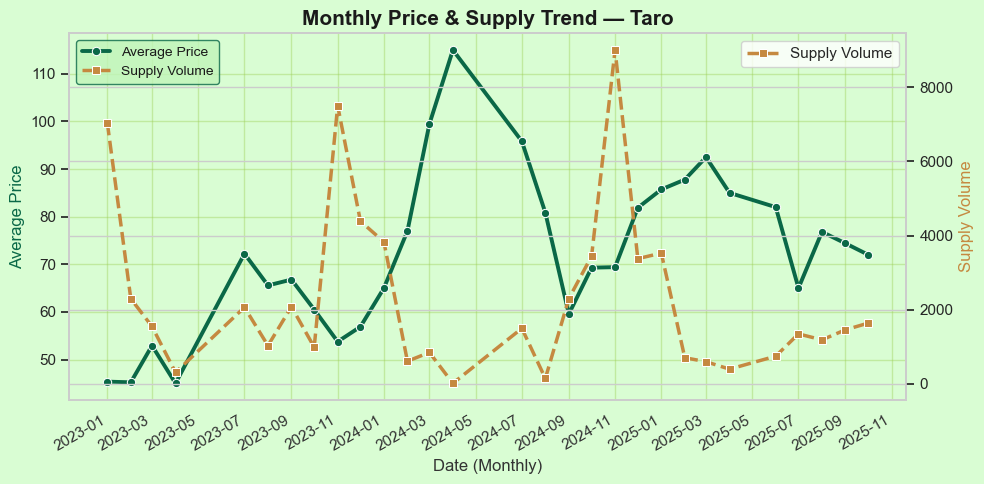

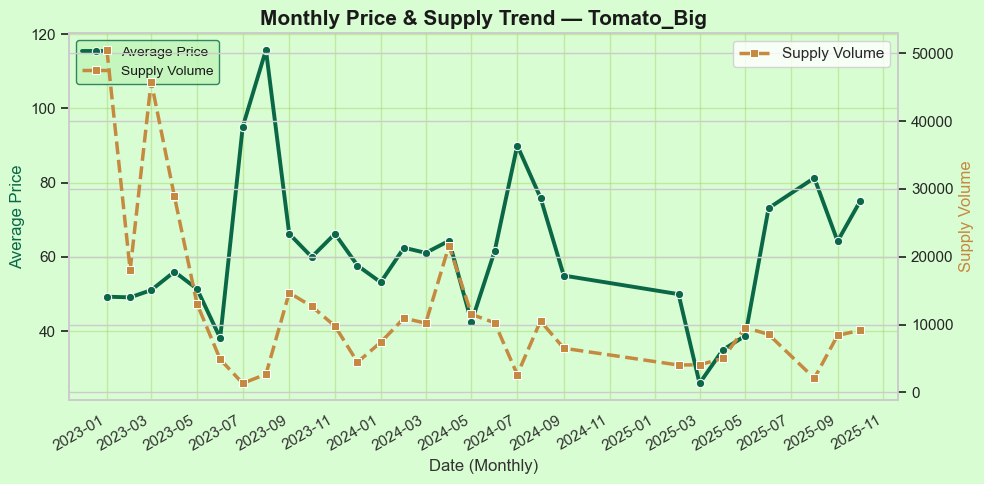

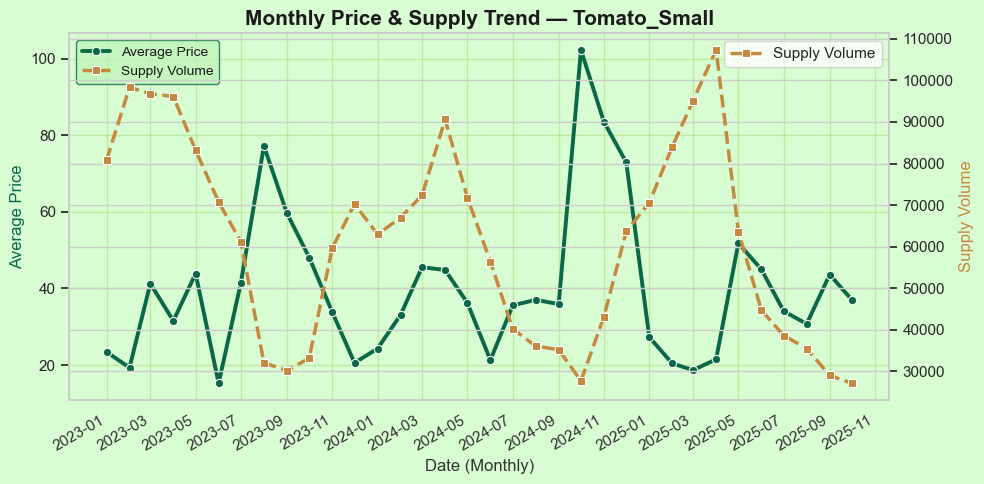

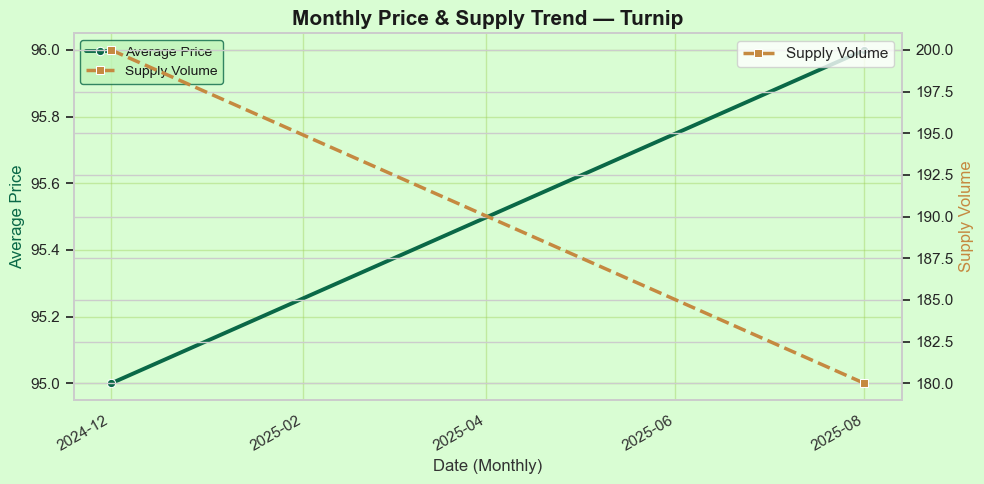

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Prepare data
df = my_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
commodities = sorted(df['commodity'].unique())

# Custom Seaborn style
sns.set_theme(style="whitegrid")

for com in commodities:
    sub = df[df['commodity'] == com].copy()
    monthly = (
        sub.set_index('Date')
           .resample('MS')
           .agg({'Average_price': 'mean', 'supply_Volume': 'mean'})
           .dropna()
           .reset_index()
    )

    if monthly.empty:
        continue

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # 🌿 Light green background
    light_green = "#d9fdd3"   # soft mint green
    fig.patch.set_facecolor(light_green)
    ax1.set_facecolor(light_green)
    ax2.set_facecolor(light_green)

    # ✨ Line colors: green and gold
    sns.lineplot(
        data=monthly, x='Date', y='Average_price',
        ax=ax1, color='#0A6847', linewidth=2.8, marker='o', label='Average Price'
    )
    sns.lineplot(
        data=monthly, x='Date', y='supply_Volume',
        ax=ax2, color='#C58940', linewidth=2.5, linestyle='--', marker='s', label='Supply Volume'
    )

    # 🏷 Titles and labels (emoji removed to avoid font warnings)
    ax1.set_title(f"Monthly Price & Supply Trend — {com}",
                  fontsize=15, color='#1a1a1a', weight='bold')
    ax1.set_xlabel("Date (Monthly)", color='#333333', fontsize=12)
    ax1.set_ylabel("Average Price", color='#0A6847', fontsize=12)
    ax2.set_ylabel("Supply Volume", color='#C58940', fontsize=12)

    # 📅 Format x-axis as months
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax1.get_xticklabels(), rotation=30, ha='right', color='#333333')

    # 🧭 Legend styling
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2, labels1 + labels2,
        loc='upper left',
        facecolor='#c0f5b9',
        edgecolor='#0A6847',
        labelcolor='#1a1a1a',
        fontsize=10
    )

    # 💡 Subtle grid
    ax1.grid(True, color='#9BCF53', alpha=0.4)
    plt.tight_layout()
    plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import re

# ===============================
#  Prepare and Clean Data
# ===============================
df = my_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
commodities = sorted(df['commodity'].unique())

# ===============================
#  Create Output Folder
# ===============================
output_dir = "pictures"
os.makedirs(output_dir, exist_ok=True)

# ===============================
#  Seaborn Theme Settings
# ===============================
sns.set_theme(style="whitegrid")

# ===============================
#  Loop Through Commodities
# ===============================
for com in commodities:
    sub = df[df['commodity'] == com].copy()
    monthly = (
        sub.set_index('Date')
           .resample('MS')  # Monthly start resampling
           .agg({'Average_price': 'mean', 'supply_Volume': 'mean'})
           .dropna()
           .reset_index()
    )

    if monthly.empty:
        continue

    # ===============================
    #  Plot Setup
    # ===============================
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # Light green background
    light_green = "#d9fdd3"
    fig.patch.set_facecolor(light_green)
    ax1.set_facecolor(light_green)
    ax2.set_facecolor(light_green)

    # Lines for both axes
    sns.lineplot(
        data=monthly, x='Date', y='Average_price',
        ax=ax1, color='#0A6847', linewidth=2.8, marker='o', label='Average Price'
    )
    sns.lineplot(
        data=monthly, x='Date', y='supply_Volume',
        ax=ax2, color='#C58940', linewidth=2.5, linestyle='--', marker='s', label='Supply Volume'
    )

    # Titles & Labels
    ax1.set_title(f"Monthly Price & Supply Trend — {com}",
                  fontsize=15, color='#1a1a1a', weight='bold')
    ax1.set_xlabel("Date (Monthly)", color='#333333', fontsize=12)
    ax1.set_ylabel("Average Price", color='#0A6847', fontsize=12)
    ax2.set_ylabel("Supply Volume", color='#C58940', fontsize=12)

    # X-axis formatting
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax1.get_xticklabels(), rotation=30, ha='right', color='#333333')

    # Legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2, labels1 + labels2,
        loc='upper left',
        facecolor='#c0f5b9',
        edgecolor='#0A6847',
        labelcolor='#1a1a1a',
        fontsize=10
    )

    # Subtle grid
    ax1.grid(True, color='#9BCF53', alpha=0.4)
    plt.tight_layout()

    # ===============================
    #  Save Plot as PNG
    # ===============================
    safe_name = re.sub(r'[^A-Za-z0-9_-]+', '_', com)
    file_path = os.path.join(output_dir, f"{safe_name}.png")
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

print(f"✅ All plots saved successfully inside the '{os.path.abspath(output_dir)}' folder.")


✅ All plots saved successfully inside the 'D:\Data Science\First Semester\Machine Learning\Group Project\Kalimati Price\pictures' folder.
